In [10]:
import pandas as pd
import nltk
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')
import pickle
from nltk import everygrams
from nltk.tokenize import word_tokenize
from nltk import pos_tag

[nltk_data] Downloading package punkt to
[nltk_data]     /common/home/projectgrps/IS424/IS424G11/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /common/home/projectgrps/IS424/IS424G11/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [11]:
df = pd.read_csv("GRAB_REVIEWS_CLEANED 6.csv")

In [12]:
df['review_datetime_utc'] = pd.to_datetime(df['review_datetime_utc'])

In [13]:
ver1_positive = df.loc[(df['review_datetime_utc'] < '2014-04-16') & (df['translated_review_cleaned_sentiment'] == 'POSITIVE'), 'translated_review_stopremoved']
ver1_negative = df.loc[(df['review_datetime_utc'] < '2014-04-16') & (df['translated_review_cleaned_sentiment'] == 'NEGATIVE'), 'translated_review_stopremoved']

# Apr 16, 2014, Launced on google play GrabTransport JustGrab GrabShare GrabHitch GrabCar GrabCar Premium GrabExec GrabFamily GrabPet

ver2_positive = df.loc[(df['review_datetime_utc'] > '2014-04-15') & (df['review_datetime_utc'] <= '2016-12-07') & (df['translated_review_cleaned_sentiment'] == 'POSITIVE'), 'translated_review_stopremoved']
ver2_negative = df.loc[(df['review_datetime_utc'] > '2014-04-15') & (df['review_datetime_utc'] <= '2016-12-07') & (df['translated_review_cleaned_sentiment'] == 'NEGATIVE'), 'translated_review_stopremoved']

# 8 Dec 2016 Introduction of GrabRewards
ver3_positive = df.loc[(df['review_datetime_utc'] > '2016-12-07') & (df['review_datetime_utc'] <= '2017-11-01') & (df['translated_review_cleaned_sentiment'] == 'POSITIVE'), 'translated_review_stopremoved']
ver3_negative = df.loc[(df['review_datetime_utc'] > '2016-12-07') & (df['review_datetime_utc'] <= '2017-11-01') & (df['translated_review_cleaned_sentiment'] == 'NEGATIVE'), 'translated_review_stopremoved']

# 2 November 2017 Grab Pay
ver4_positive = df.loc[(df['review_datetime_utc'] > '2017-11-01') & (df['review_datetime_utc'] <= '2018-04-30') & (df['translated_review_cleaned_sentiment'] == 'POSITIVE'), 'translated_review_stopremoved']
ver4_negative = df.loc[(df['review_datetime_utc'] > '2017-11-01') & (df['review_datetime_utc'] <= '2018-04-30') & (df['translated_review_cleaned_sentiment'] == 'NEGATIVE'), 'translated_review_stopremoved']

# May 2018 GrabFood
ver5_positive = df.loc[(df['review_datetime_utc'] > '2018-04-30') & (df['review_datetime_utc'] <= '2019-01-31') & (df['translated_review_cleaned_sentiment'] == 'POSITIVE'), 'translated_review_stopremoved']
ver5_negative = df.loc[(df['review_datetime_utc'] > '2018-04-30') & (df['review_datetime_utc'] <= '2019-01-31') & (df['translated_review_cleaned_sentiment'] == 'NEGATIVE'), 'translated_review_stopremoved']

# February 2019 GrabExpress
ver6_positive = df.loc[(df['review_datetime_utc'] > '2019-01-31') & (df['review_datetime_utc'] <= '2019-07-01') & (df['translated_review_cleaned_sentiment'] == 'POSITIVE'), 'translated_review_stopremoved']
ver6_negative = df.loc[(df['review_datetime_utc'] > '2019-01-31') & (df['review_datetime_utc'] <= '2019-07-01') & (df['translated_review_cleaned_sentiment'] == 'NEGATIVE'), 'translated_review_stopremoved']

# 2 July 2019 PayLater
ver7_positive = df.loc[(df['review_datetime_utc'] > '2019-07-01') & (df['review_datetime_utc'] <= '2019-07-31') & (df['translated_review_cleaned_sentiment'] == 'POSITIVE'), 'translated_review_stopremoved']
ver7_negative = df.loc[(df['review_datetime_utc'] > '2019-07-01') & (df['review_datetime_utc'] <= '2019-07-31') & (df['translated_review_cleaned_sentiment'] == 'NEGATIVE'), 'translated_review_stopremoved']

# 1 Aug 2019 GrabInsure
ver8_positive = df.loc[(df['review_datetime_utc'] > '2019-07-31') & (df['review_datetime_utc'] <= '2019-10-31') & (df['translated_review_cleaned_sentiment'] == 'POSITIVE'), 'translated_review_stopremoved']
ver8_negative = df.loc[(df['review_datetime_utc'] > '2019-07-31') & (df['review_datetime_utc'] <= '2019-10-31') & (df['translated_review_cleaned_sentiment'] == 'NEGATIVE'), 'translated_review_stopremoved']

# Nov 2019 GrabMart
ver9_positive = df.loc[(df['review_datetime_utc'] > '2019-10-31') & (df['review_datetime_utc'] <= '2019-12-04') & (df['translated_review_cleaned_sentiment'] == 'POSITIVE'), 'translated_review_stopremoved']
ver9_negative = df.loc[(df['review_datetime_utc'] > '2019-10-31') & (df['review_datetime_utc'] <= '2019-12-04') & (df['translated_review_cleaned_sentiment'] == 'NEGATIVE'), 'translated_review_stopremoved']

# 5 Dec 2019 GrabPay Card
ver10_positive = df.loc[(df['review_datetime_utc'] > '2019-12-04') & (df['translated_review_cleaned_sentiment'] == 'POSITIVE'), 'translated_review_stopremoved']
ver10_negative = df.loc[(df['review_datetime_utc'] > '2019-12-04') & (df['translated_review_cleaned_sentiment'] == 'NEGATIVE'), 'translated_review_stopremoved']


In [16]:
from gensim import corpora
from gensim.models import LdaModel
from nltk.tokenize import word_tokenize
from nltk.util import everygrams

def tokenize_and_extract_bigrams(text):
    tokens = word_tokenize(text)
    bigrams = [' '.join(bg) for bg in everygrams(tokens, 2, 2)]
    return bigrams

versions = [
    ("Version 1", ver1_positive, ver1_negative),
    ("Version 2", ver2_positive, ver2_negative),
    ("Version 3", ver3_positive, ver3_negative),
    ("Version 4", ver4_positive, ver4_negative),
    ("Version 5", ver5_positive, ver5_negative),
    ("Version 6", ver6_positive, ver6_negative),
    ("Version 7", ver7_positive, ver7_negative),
    ("Version 8", ver8_positive, ver8_negative),
    ("Version 9", ver9_positive, ver9_negative),
    ("Version 10", ver10_positive, ver10_negative)
]

for version, positive_reviews, negative_reviews in versions:
    print(f"Version: {version}")
    print("Positive Reviews:")
    tokenized_positive_reviews = [tokenize_and_extract_bigrams(review) for review in positive_reviews.tolist()]
    dictionary_pos = corpora.Dictionary(tokenized_positive_reviews)
    corpus_pos = [dictionary_pos.doc2bow(tokens) for tokens in tokenized_positive_reviews]
    lda_model_pos = LdaModel(corpus_pos, num_topics=5, id2word=dictionary_pos, passes=15)
    for idx, topic in lda_model_pos.print_topics(-1):
        print(f"Topic {idx}: {topic}")

    print("\nNegative Reviews:")
    tokenized_negative_reviews = [tokenize_and_extract_bigrams(review) for review in negative_reviews.tolist()]
    dictionary_neg = corpora.Dictionary(tokenized_negative_reviews)
    corpus_neg = [dictionary_neg.doc2bow(tokens) for tokens in tokenized_negative_reviews]
    lda_model_neg = LdaModel(corpus_neg, num_topics=5, id2word=dictionary_neg, passes=15)
    for idx, topic in lda_model_neg.print_topics(-1):
        print(f"Topic {idx}: {topic}")

    print("\n")

Version: Version 1
Positive Reviews:
Topic 0: 0.007*"really helpful" + 0.005*"first time" + 0.005*"cab drivers" + 0.005*"much better" + 0.003*"fast efficient" + 0.003*"safe convenient" + 0.003*"fast response" + 0.003*"easy find" + 0.003*"highly recommended" + 0.003*"cab driver"
Topic 1: 0.005*"cab able" + 0.005*"excellent service" + 0.003*"drivers polite" + 0.003*"lucrative pick" + 0.003*"sms upon" + 0.003*"confirm prior" + 0.003*"cabby prompt" + 0.003*"nonetheless worked" + 0.003*"pick nonetheless" + 0.003*"prompt called"
Topic 2: 0.005*"available cabs" + 0.005*"used today" + 0.005*"user real" + 0.005*"hassle free" + 0.005*"great much" + 0.005*"experience far" + 0.005*"ride taxi" + 0.005*"efficient safe" + 0.005*"highly recommended" + 0.005*"really cool"
Topic 3: 0.006*"find taxi" + 0.006*"getting taxi" + 0.006*"fast booking" + 0.006*"booking cab" + 0.006*"easy find" + 0.003*"really helpful" + 0.003*"safe convenient" + 0.003*"taxi company" + 0.003*"official taxi" + 0.003*"free booking

Version: Version 1
Positive Reviews:
Topic 0: 0.007*"highly recommended" + 0.007*"fast efficient" + 0.005*"booking cab" + 0.005*"getting taxi" + 0.005*"nice one" + 0.003*"really helpful" + 0.003*"calling taxi" + 0.003*"user real" + 0.003*"safe convenient" + 0.003*"available cabs"
Topic 1: 0.005*"cab drivers" + 0.005*"ride taxi" + 0.005*"really cool" + 0.003*"much better" + 0.003*"easy book" + 0.003*"fast booking" + 0.003*"never failed" + 0.003*"great much" + 0.003*"call driver" + 0.003*"cab able"
Topic 2: 0.005*"first time" + 0.005*"safe convenient" + 0.005*"excellent service" + 0.005*"much better" + 0.005*"really helpful" + 0.003*"today cab" + 0.003*"drivers polite" + 0.003*"free booking" + 0.003*"taxi driver" + 0.003*"booked second"
Topic 3: 0.006*"find taxi" + 0.006*"easy taxi" + 0.006*"friendly drivers" + 0.006*"convenient safe" + 0.006*"great experience" + 0.006*"great help" + 0.006*"good useful" + 0.006*"easy find" + 0.003*"getting cab" + 0.003*"great able"
Topic 4: 0.007*"taxi c

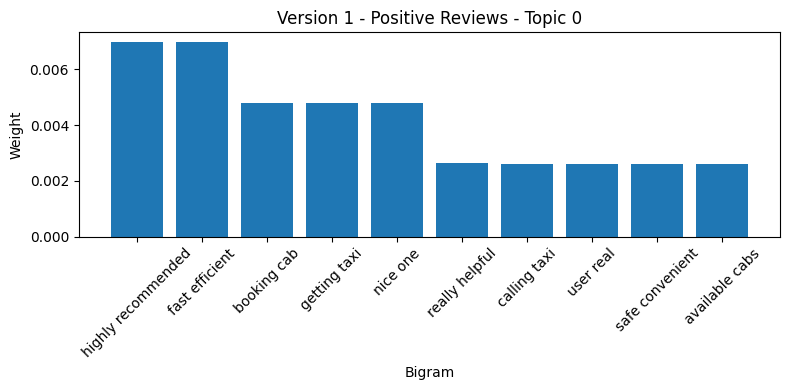

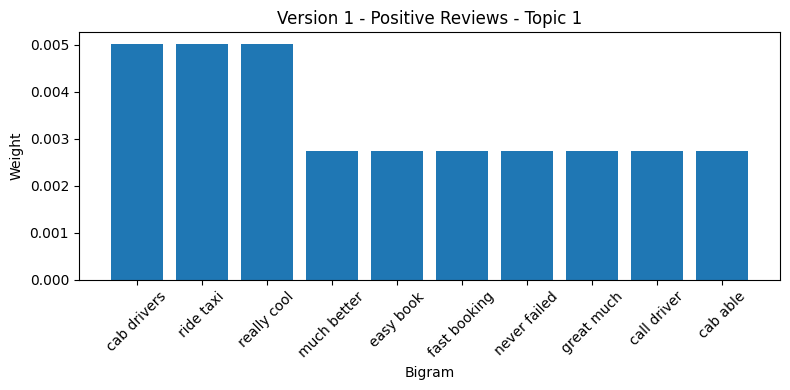

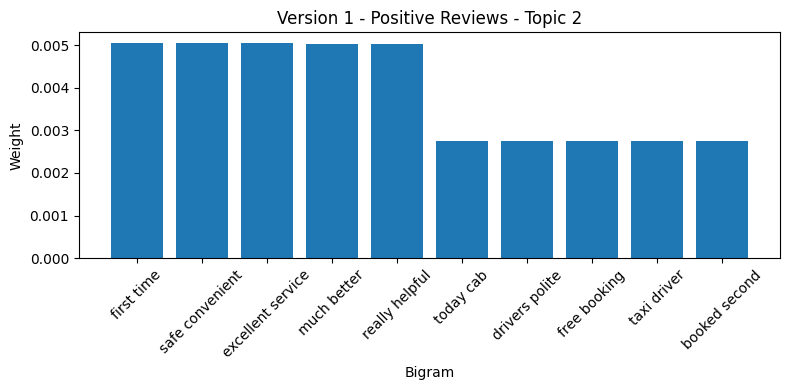

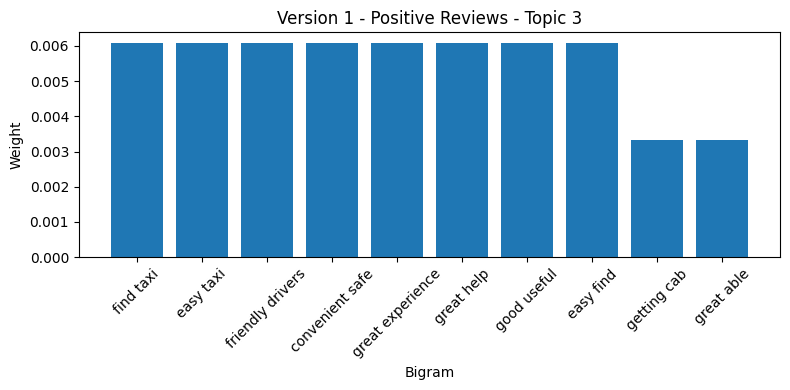

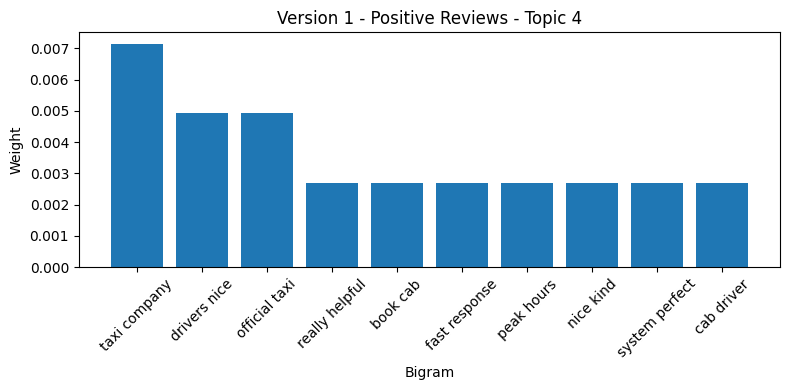


Negative Reviews:
Topic 0: 0.008*"taxi drivers" + 0.004*"internet connection" + 0.004*"time even" + 0.004*"taxi never" + 0.004*"gps tracking" + 0.004*"easy taxi" + 0.004*"later time" + 0.002*"cab location" + 0.002*"peak hours" + 0.002*"got cab"
Topic 1: 0.005*"book taxi" + 0.005*"cancel option" + 0.003*"find location" + 0.003*"taxi company" + 0.003*"booking taxi" + 0.003*"booking fee" + 0.003*"would great" + 0.003*"rush hours" + 0.003*"call driver" + 0.003*"driver call"
Topic 2: 0.004*"booking charges" + 0.002*"rush hour" + 0.002*"time accurate" + 0.002*"call driver" + 0.002*"experience frustrating" + 0.002*"charges clearly" + 0.002*"wait also" + 0.002*"costs explicitly" + 0.002*"near cancel" + 0.002*"super lousy"
Topic 3: 0.005*"taxi driver" + 0.005*"right away" + 0.005*"booking suddenly" + 0.005*"got taxi" + 0.005*"taxi right" + 0.003*"waiting taxi" + 0.003*"taxi came" + 0.003*"taxi got" + 0.003*"complain good" + 0.003*"ignored complain"
Topic 4: 0.004*"without extra" + 0.004*"locat

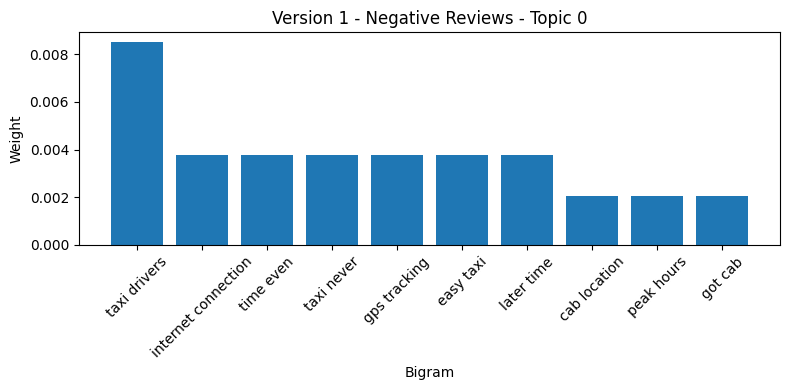

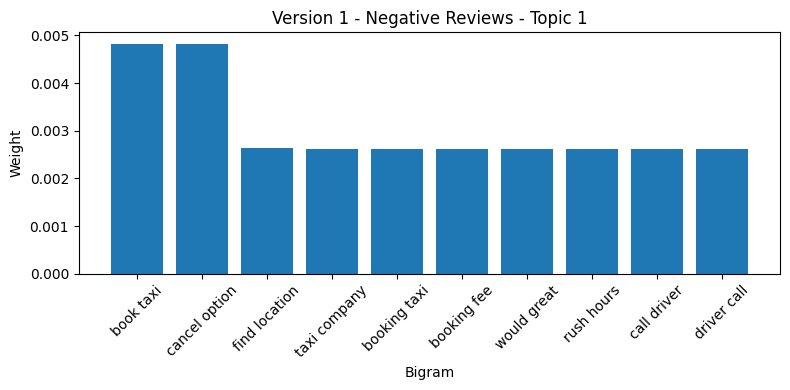

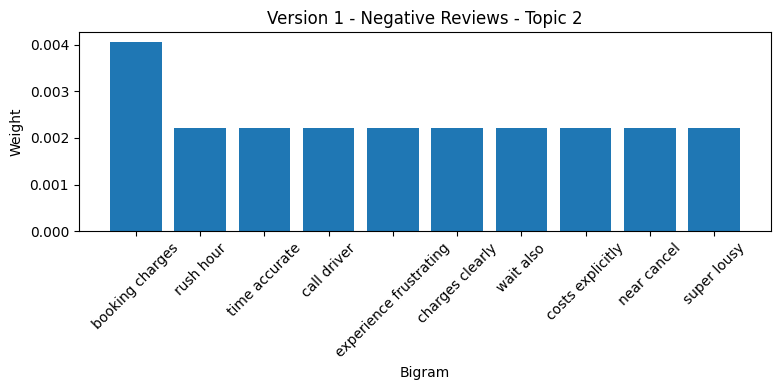

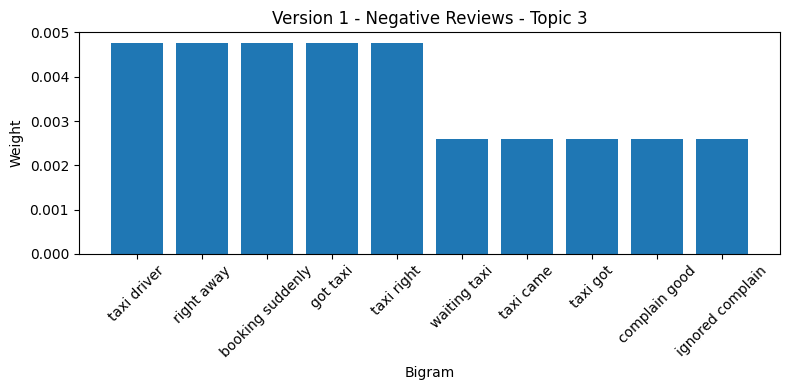

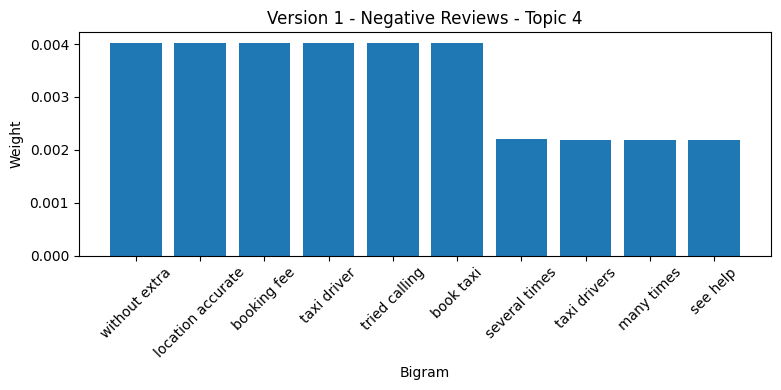



Version: Version 2
Positive Reviews:
Topic 0: 0.010*"great service" + 0.006*"really good" + 0.005*"go anywhere" + 0.005*"good good" + 0.004*"excellent service" + 0.004*"nice driver" + 0.003*"fast response" + 0.003*"easy go" + 0.003*"drivers nice" + 0.003*"drivers good"
Topic 1: 0.006*"service good" + 0.004*"good drivers" + 0.003*"best service" + 0.003*"really helpfull" + 0.003*"feel safe" + 0.003*"fast efficient" + 0.003*"promo code" + 0.003*"better uber" + 0.003*"good aplication" + 0.002*"public transportation"
Topic 2: 0.009*"far good" + 0.006*"good driver" + 0.005*"drivers polite" + 0.005*"really helps" + 0.003*"good easy" + 0.003*"life easier" + 0.003*"well done" + 0.003*"really like" + 0.002*"make life" + 0.002*"good helpful"
Topic 3: 0.012*"user friendly" + 0.005*"fast easy" + 0.004*"best ever" + 0.004*"good services" + 0.003*"helpful easy" + 0.003*"easy helpful" + 0.003*"nice service" + 0.002*"simple easy" + 0.002*"nice easy" + 0.002*"best taxi"
Topic 4: 0.035*"good service" +

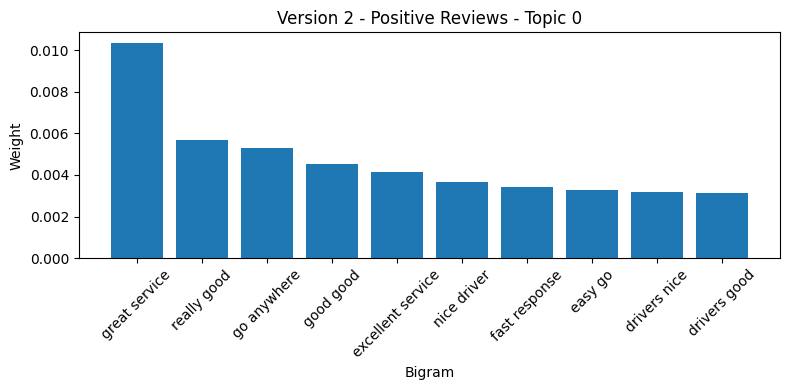

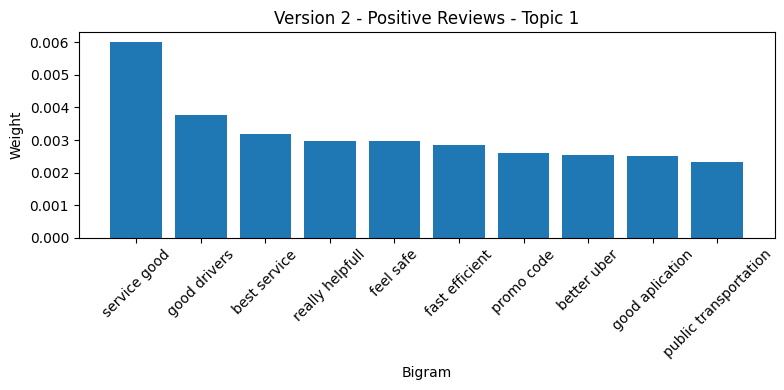

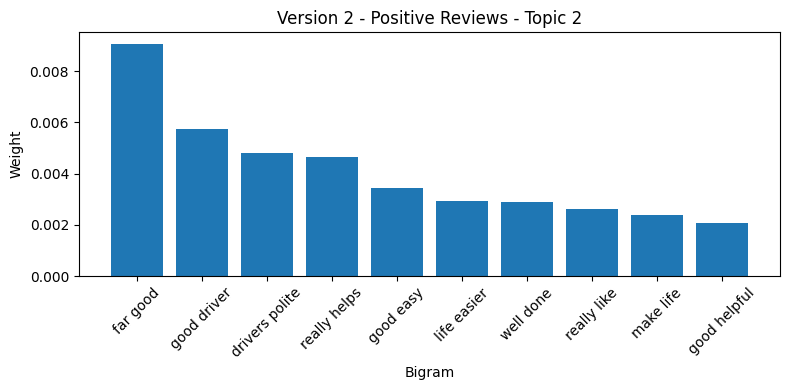

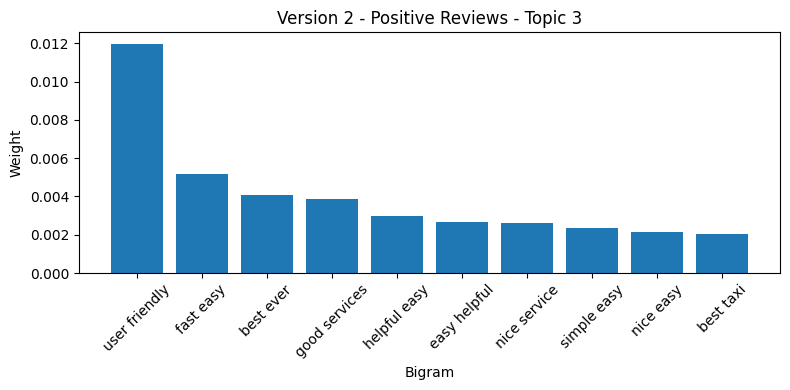

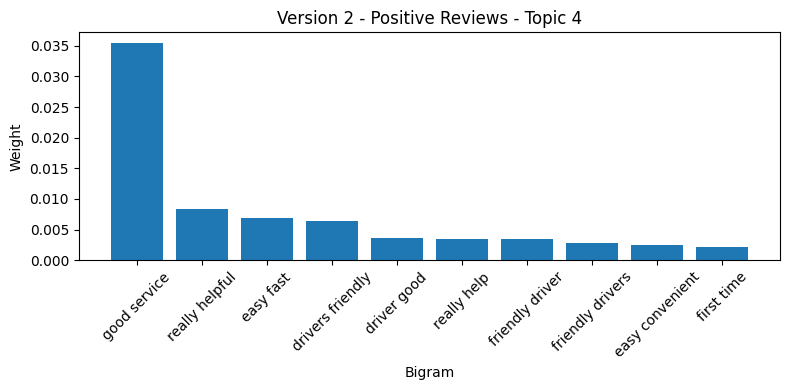


Negative Reviews:
Topic 0: 0.002*"far away" + 0.002*"even though" + 0.001*"many drivers" + 0.001*"rush hour" + 0.001*"long time" + 0.001*"taxi driver" + 0.001*"hassle free" + 0.001*"cancel booking" + 0.001*"many times" + 0.001*"driver cancel"
Topic 1: 0.003*"promo code" + 0.002*"several times" + 0.002*"customer service" + 0.001*"first time" + 0.001*"cheap fast" + 0.001*"bad service" + 0.001*"many times" + 0.001*"verification code" + 0.001*"phone number" + 0.001*"even though"
Topic 2: 0.007*"promo code" + 0.003*"promo codes" + 0.001*"even though" + 0.001*"find location" + 0.001*"much better" + 0.001*"new update" + 0.001*"good driver" + 0.001*"account suspended" + 0.001*"fix problem" + 0.001*"latest version"
Topic 3: 0.004*"internet connection" + 0.002*"book ride" + 0.001*"says internet" + 0.001*"even though" + 0.001*"driver accept" + 0.001*"cancel booking" + 0.001*"estimated fare" + 0.001*"taxi drivers" + 0.001*"would better" + 0.001*"connection even"
Topic 4: 0.005*"uber uber" + 0.003

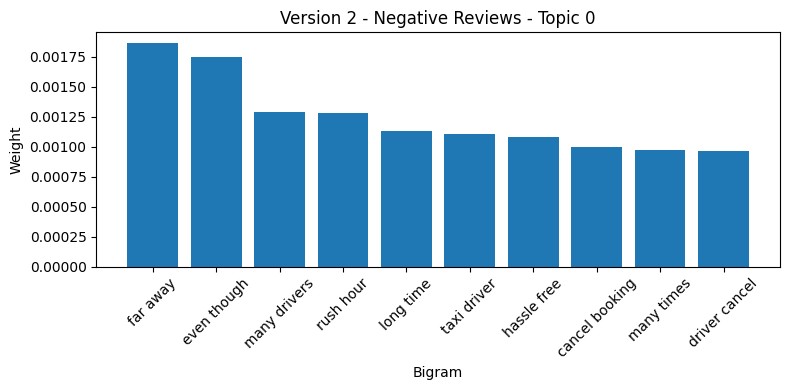

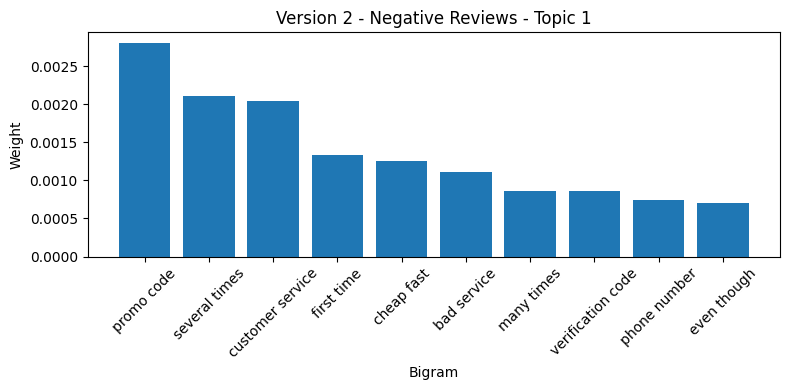

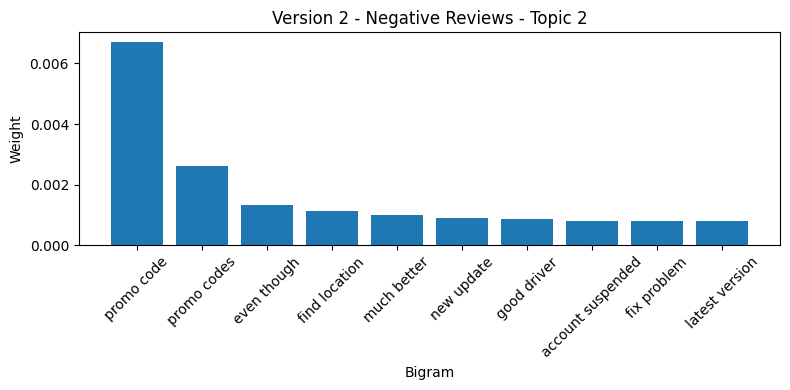

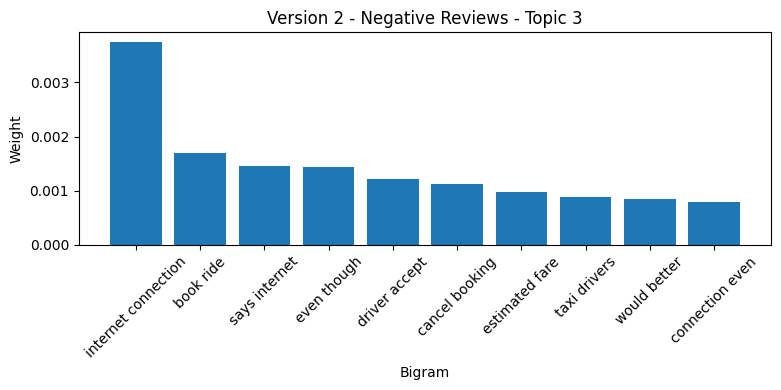

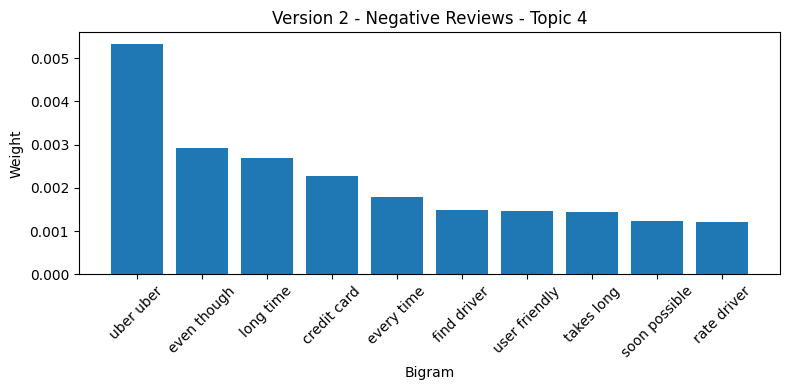



Version: Version 3
Positive Reviews:
Topic 0: 0.012*"really helpful" + 0.005*"nice service" + 0.005*"best ever" + 0.004*"good helpful" + 0.004*"best service" + 0.004*"promo code" + 0.004*"helps lot" + 0.004*"good aplication" + 0.003*"really helps" + 0.003*"friendly drivers"
Topic 1: 0.012*"great service" + 0.008*"good easy" + 0.004*"overall good" + 0.004*"help lot" + 0.003*"easy convenient" + 0.003*"friendly driver" + 0.003*"best transport" + 0.003*"fast response" + 0.003*"great helpful" + 0.003*"great easy"
Topic 2: 0.009*"life easier" + 0.007*"better uber" + 0.005*"makes life" + 0.005*"make life" + 0.005*"good driver" + 0.004*"good transportation" + 0.003*"really help" + 0.003*"online transportation" + 0.003*"make easy" + 0.003*"good us"
Topic 3: 0.010*"go anywhere" + 0.009*"easy go" + 0.009*"good services" + 0.008*"really good" + 0.005*"easy fast" + 0.004*"really like" + 0.003*"simple easy" + 0.003*"really useful" + 0.003*"good drivers" + 0.003*"drivers good"
Topic 4: 0.062*"good 

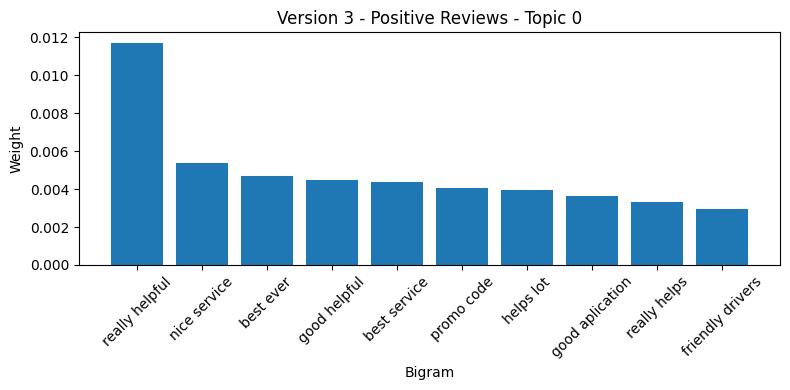

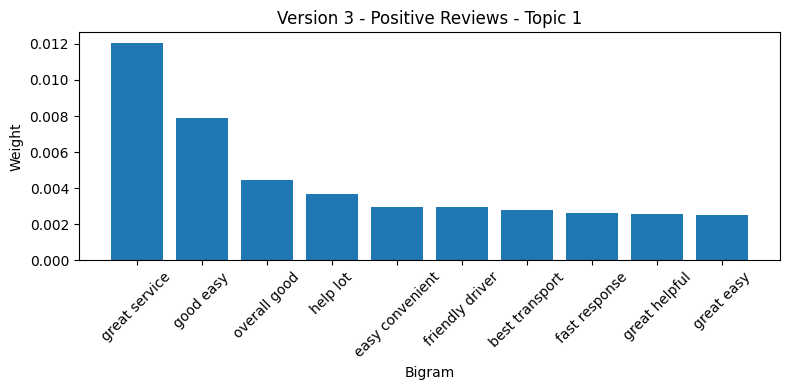

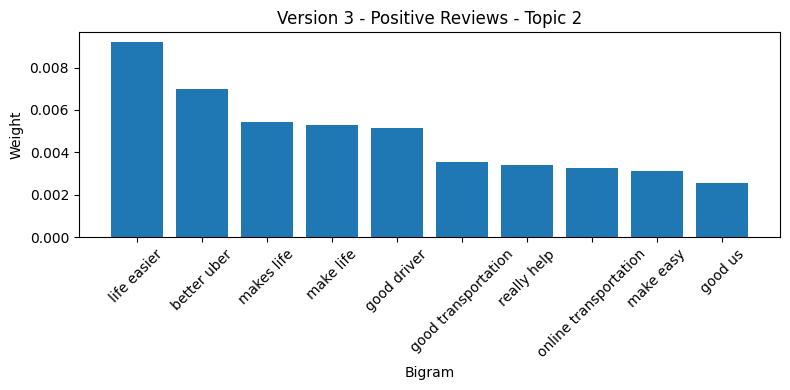

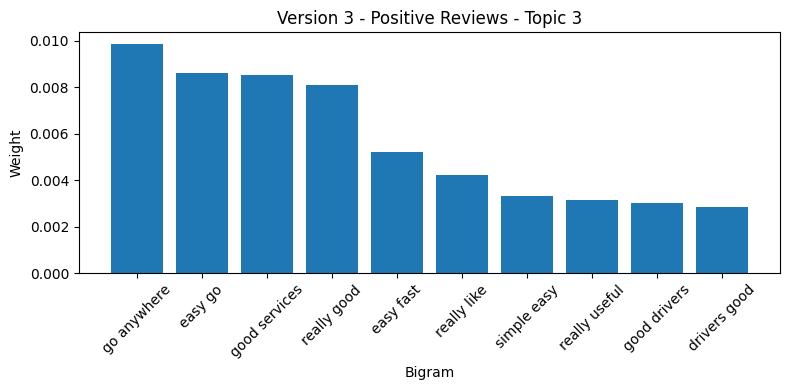

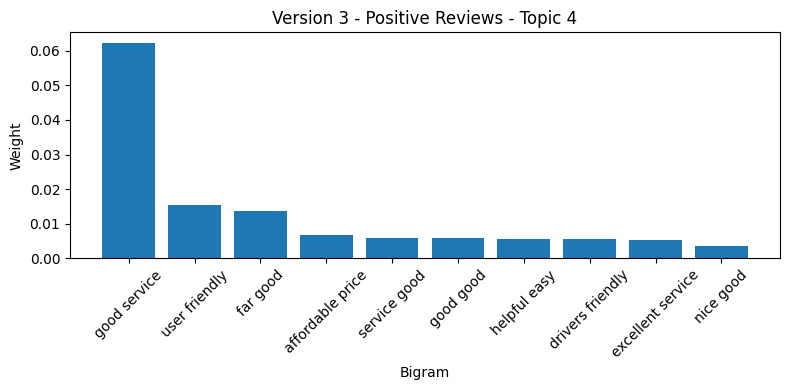


Negative Reviews:
Topic 0: 0.004*"even though" + 0.003*"long time" + 0.002*"takes long" + 0.002*"phone number" + 0.002*"find driver" + 0.002*"create account" + 0.001*"activation failed" + 0.001*"every time" + 0.001*"waste time" + 0.001*"activation code"
Topic 1: 0.004*"promo code" + 0.002*"first time" + 0.002*"pick point" + 0.001*"able connect" + 0.001*"exact location" + 0.001*"hard driver" + 0.001*"new version" + 0.001*"even though" + 0.001*"find driver" + 0.001*"many drivers"
Topic 2: 0.003*"promo code" + 0.003*"even though" + 0.002*"promotion code" + 0.002*"soon possible" + 0.002*"every time" + 0.002*"far away" + 0.001*"fix soon" + 0.001*"latest update" + 0.001*"pick location" + 0.001*"log account"
Topic 3: 0.003*"credit card" + 0.002*"long time" + 0.002*"customer service" + 0.001*"many times" + 0.001*"time driver" + 0.001*"high demand" + 0.001*"many drivers" + 0.001*"even register" + 0.001*"bad service" + 0.001*"location map"
Topic 4: 0.008*"promo code" + 0.005*"connect server" + 

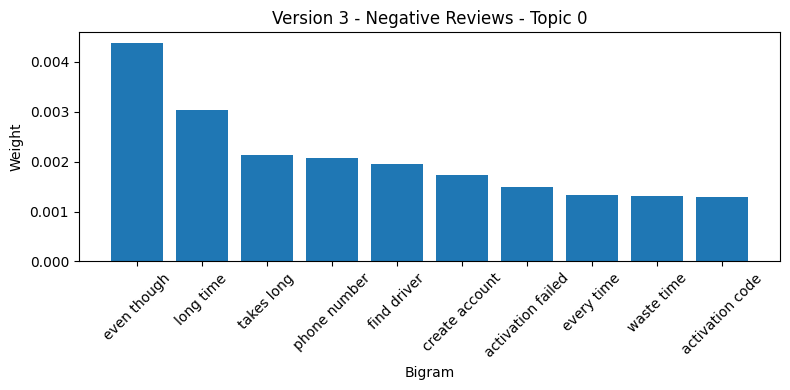

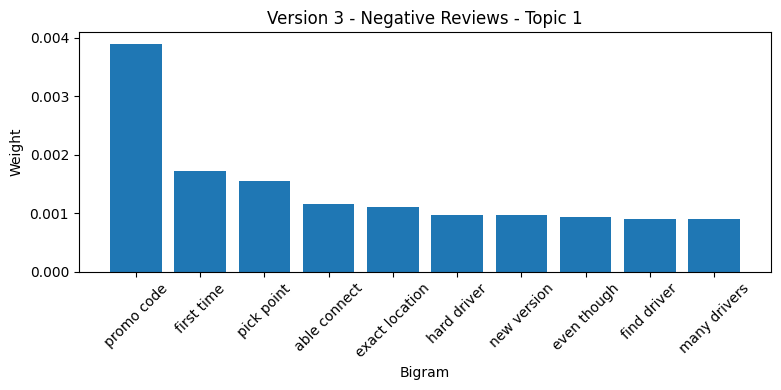

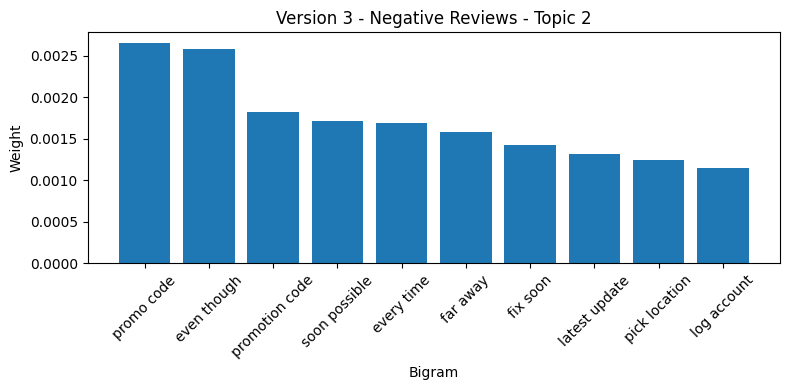

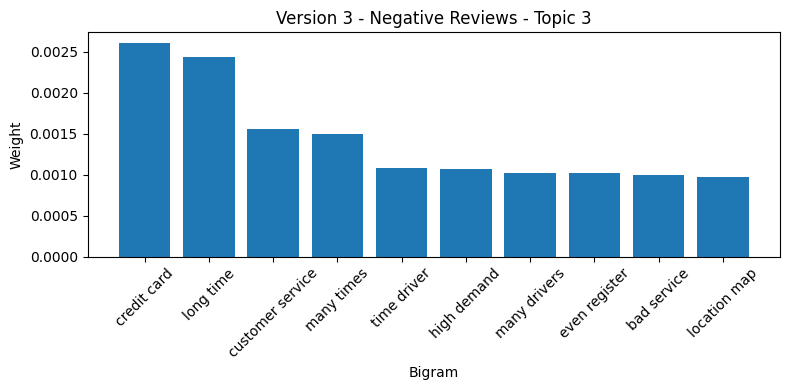

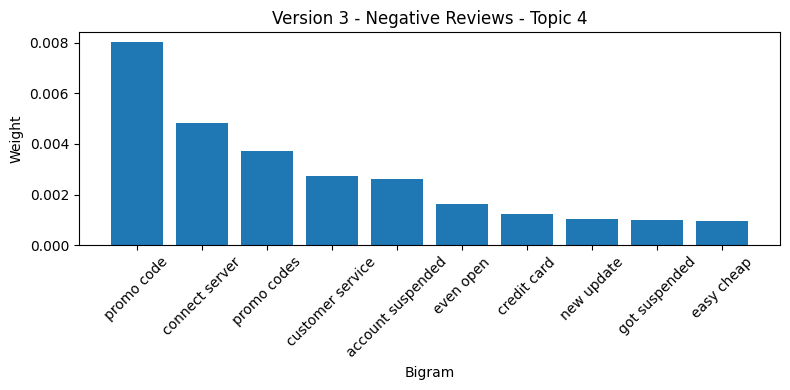



Version: Version 4
Positive Reviews:
Topic 0: 0.015*"far good" + 0.009*"good easy" + 0.008*"really good" + 0.008*"good services" + 0.006*"easy fast" + 0.004*"good good" + 0.004*"makes life" + 0.003*"life easier" + 0.003*"uber better" + 0.003*"let us"
Topic 1: 0.009*"easy go" + 0.008*"go anywhere" + 0.004*"bring back" + 0.004*"overall good" + 0.003*"back uber" + 0.002*"go everywhere" + 0.002*"really helps" + 0.002*"pretty good" + 0.002*"nice good" + 0.002*"nice drivers"
Topic 2: 0.048*"good service" + 0.006*"really helpful" + 0.004*"driver good" + 0.003*"helpful easy" + 0.003*"good enough" + 0.003*"good far" + 0.003*"service good" + 0.003*"good transportation" + 0.003*"easy good" + 0.003*"drivers friendly"
Topic 3: 0.005*"better uber" + 0.005*"great service" + 0.004*"good helpful" + 0.004*"promo code" + 0.003*"verry good" + 0.003*"nice service" + 0.003*"life easier" + 0.003*"make life" + 0.002*"helps lot" + 0.002*"always give"
Topic 4: 0.010*"user friendly" + 0.006*"excellent service"

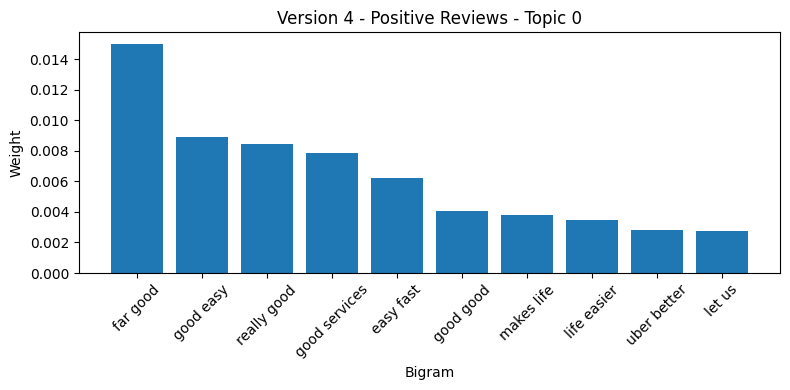

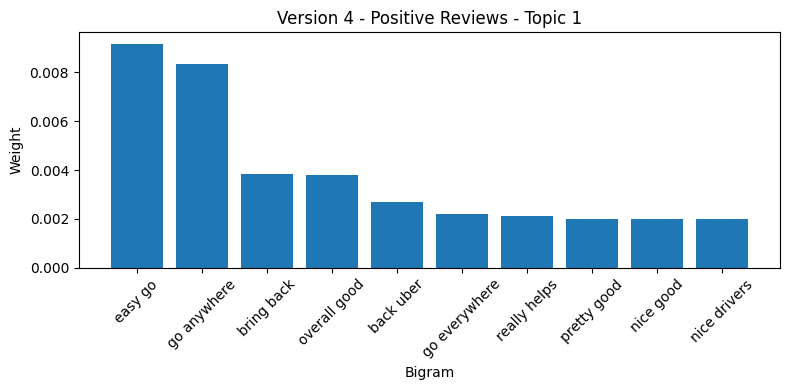

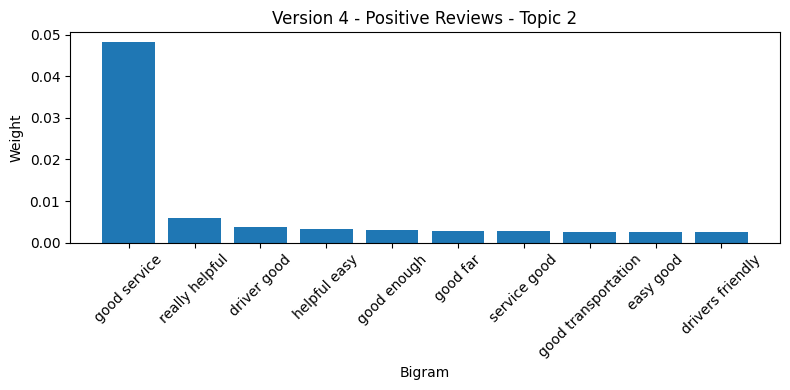

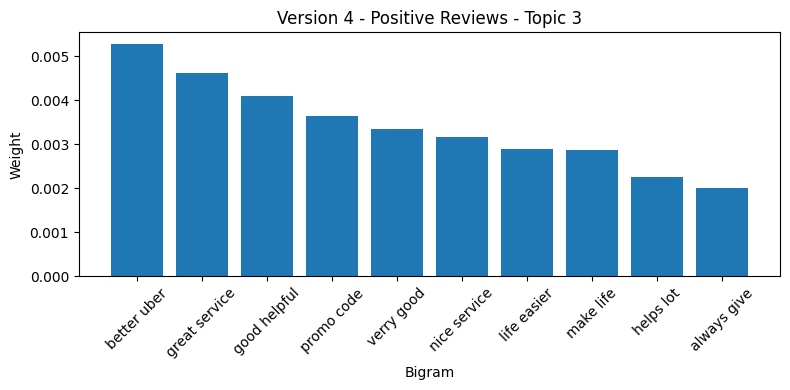

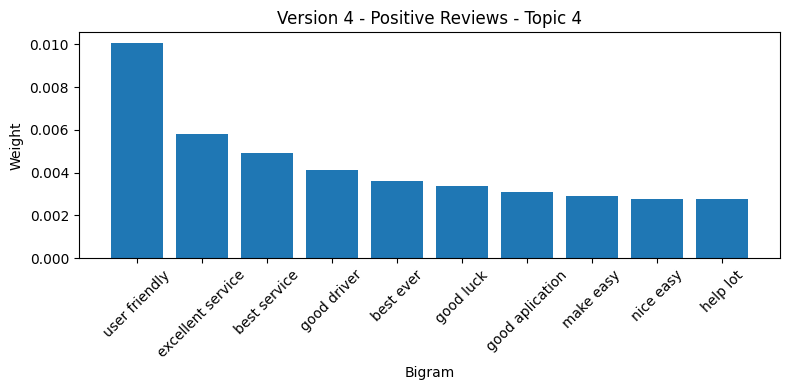


Negative Reviews:
Topic 0: 0.003*"like uber" + 0.002*"pin location" + 0.002*"location map" + 0.002*"drivers know" + 0.001*"pin point" + 0.001*"far away" + 0.001*"drivers picky" + 0.001*"always wrong" + 0.001*"price high" + 0.001*"kindly fix"
Topic 1: 0.007*"connect server" + 0.005*"promo code" + 0.003*"even though" + 0.003*"long time" + 0.002*"driver accept" + 0.002*"miss uber" + 0.001*"driver always" + 0.001*"payment method" + 0.001*"far away" + 0.001*"always driver"
Topic 2: 0.006*"customer service" + 0.003*"uber better" + 0.002*"booster seat" + 0.002*"long time" + 0.002*"log account" + 0.002*"bad customer" + 0.001*"time booking" + 0.001*"bad service" + 0.001*"updated version" + 0.001*"even though"
Topic 3: 0.003*"credit card" + 0.003*"much better" + 0.002*"uber much" + 0.002*"even open" + 0.002*"expensive uber" + 0.002*"soon possible" + 0.002*"many time" + 0.002*"needs improvement" + 0.002*"latest update" + 0.001*"promotion code"
Topic 4: 0.003*"many times" + 0.002*"first time" + 0

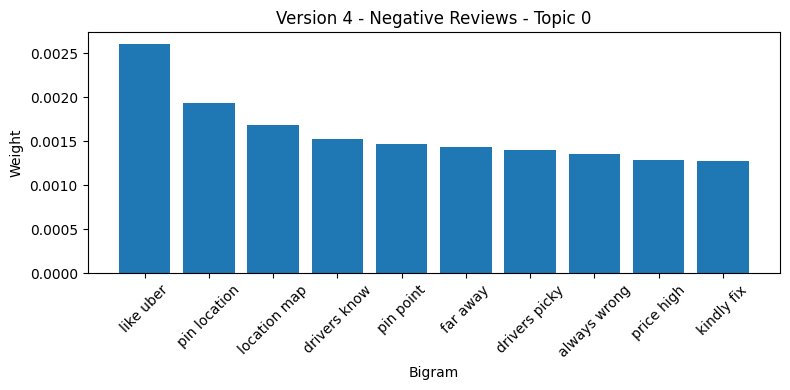

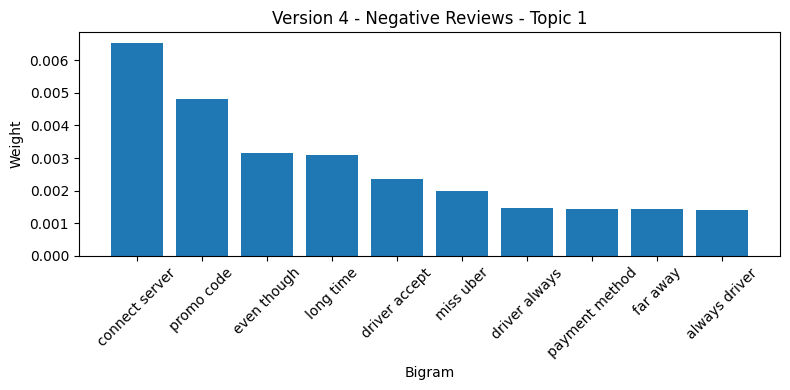

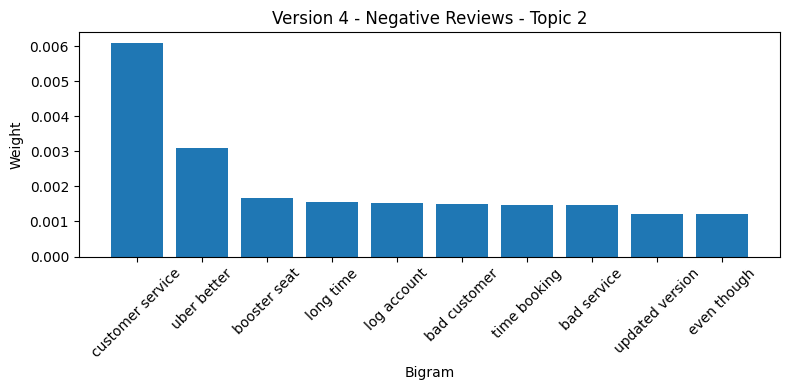

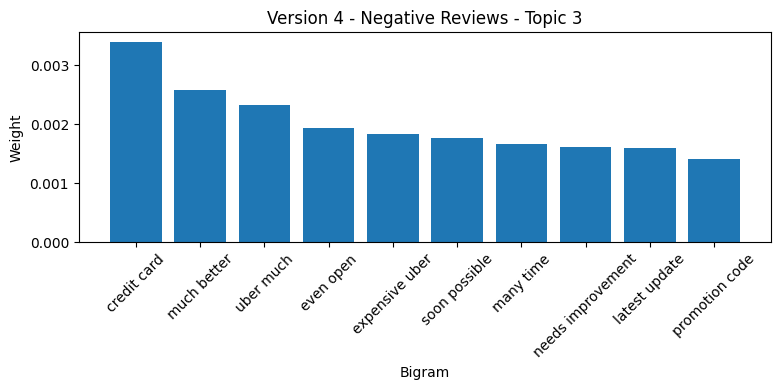

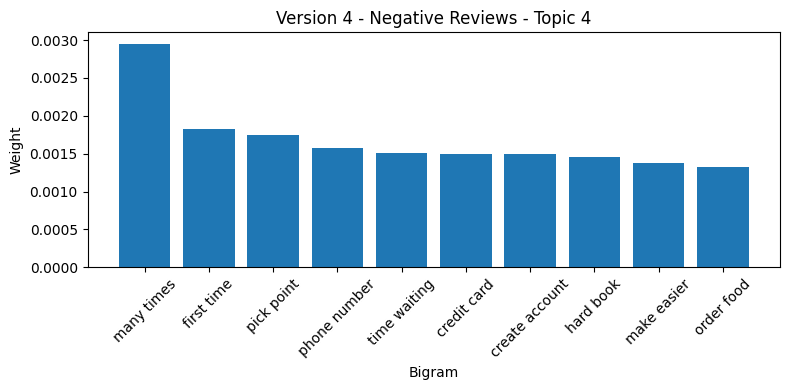



Version: Version 5
Positive Reviews:
Topic 0: 0.052*"good service" + 0.011*"far good" + 0.007*"go anywhere" + 0.007*"easy go" + 0.006*"good good" + 0.005*"good transportation" + 0.004*"good aplication" + 0.003*"service good" + 0.003*"helpful easy" + 0.003*"good helpful"
Topic 1: 0.006*"user friendly" + 0.006*"great service" + 0.004*"much better" + 0.004*"even though" + 0.003*"nice good" + 0.003*"really helps" + 0.002*"help us" + 0.002*"long time" + 0.002*"high demand" + 0.002*"good help"
Topic 2: 0.003*"good enough" + 0.003*"good useful" + 0.002*"good like" + 0.002*"best ever" + 0.002*"big help" + 0.002*"easy helpful" + 0.002*"good nice" + 0.002*"best transportation" + 0.002*"drivers friendly" + 0.002*"nice useful"
Topic 3: 0.006*"good services" + 0.006*"good easy" + 0.004*"life easier" + 0.004*"excellent service" + 0.003*"best service" + 0.003*"helps lot" + 0.003*"make life" + 0.003*"help lot" + 0.003*"think good" + 0.003*"good luck"
Topic 4: 0.008*"really good" + 0.006*"really help

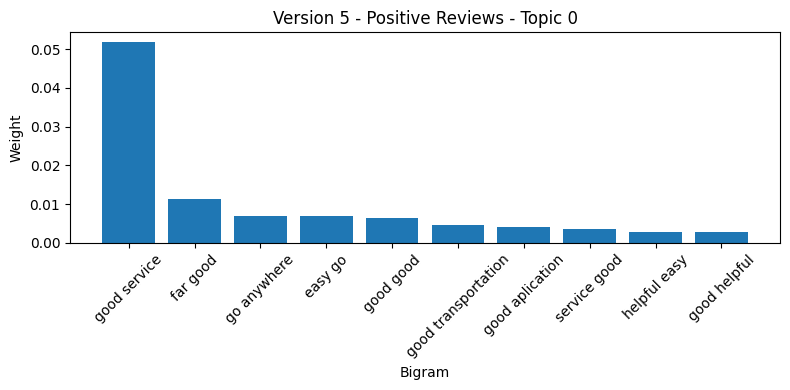

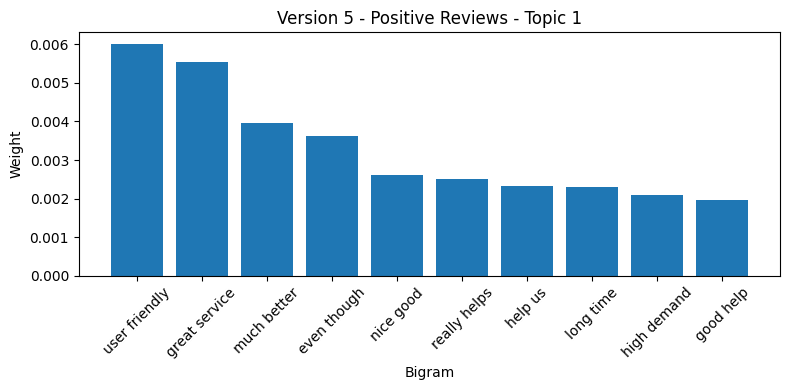

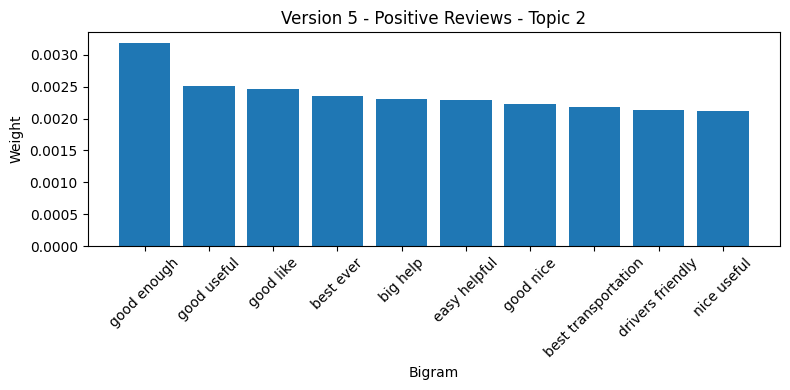

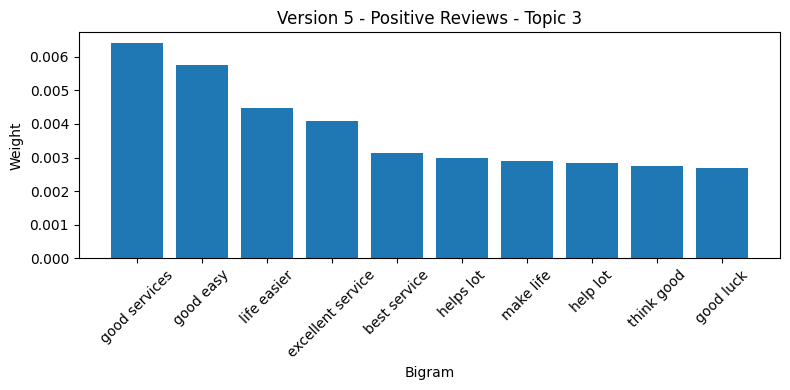

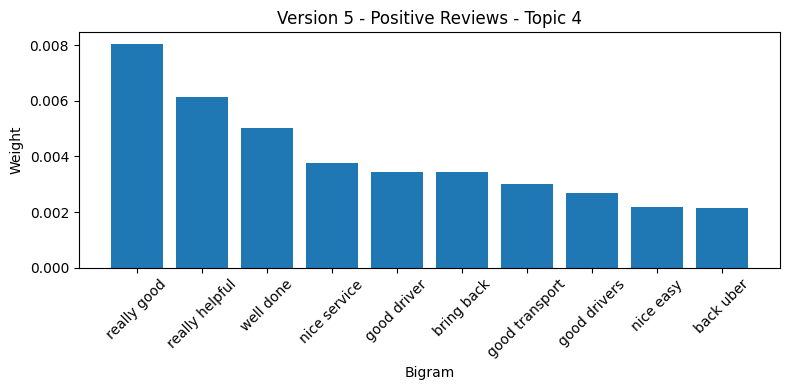


Negative Reviews:
Topic 0: 0.006*"connect server" + 0.003*"even though" + 0.002*"cancel booking" + 0.002*"worst ever" + 0.002*"server error" + 0.001*"long time" + 0.001*"asked cancel" + 0.001*"driver could" + 0.001*"lot time" + 0.001*"ask cancel"
Topic 1: 0.004*"promo code" + 0.002*"far away" + 0.002*"new update" + 0.002*"drivers busy" + 0.002*"user friendly" + 0.001*"new version" + 0.001*"many times" + 0.001*"credit card" + 0.001*"newest update" + 0.001*"every day"
Topic 2: 0.004*"ovo balance" + 0.003*"customer service" + 0.002*"facebook account" + 0.002*"phone number" + 0.002*"even though" + 0.001*"bad service" + 0.001*"drivers also" + 0.001*"suspend account" + 0.001*"order one" + 0.001*"first time"
Topic 3: 0.006*"even though" + 0.003*"every time" + 0.002*"book ride" + 0.002*"high demand" + 0.001*"fix bug" + 0.001*"using ovo" + 0.001*"phone number" + 0.001*"create account" + 0.001*"using cash" + 0.001*"customer service"
Topic 4: 0.003*"payment method" + 0.002*"many times" + 0.002*"

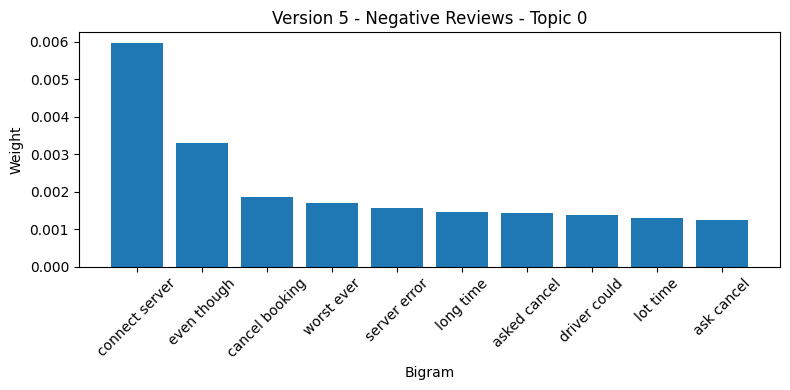

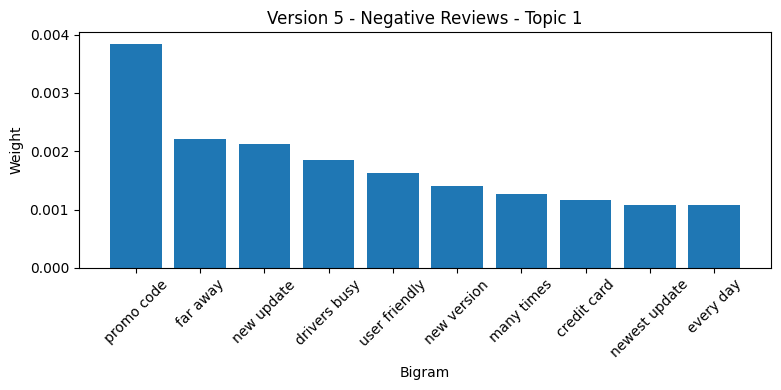

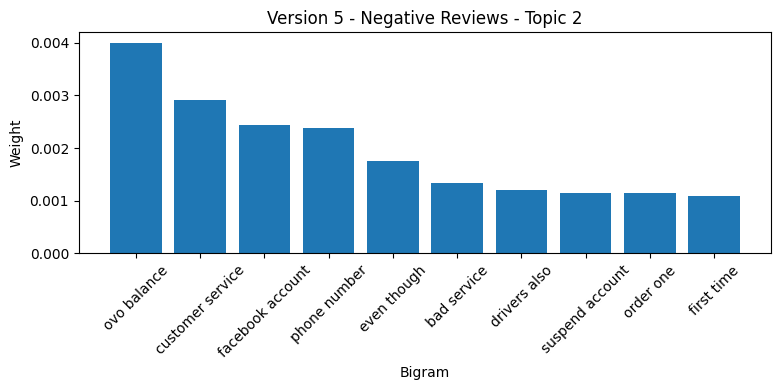

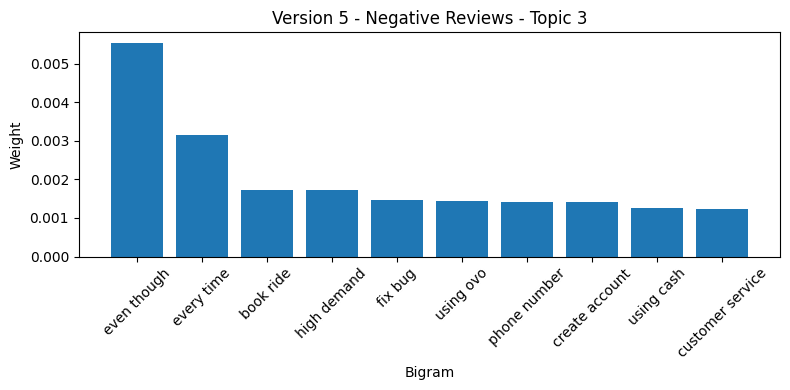

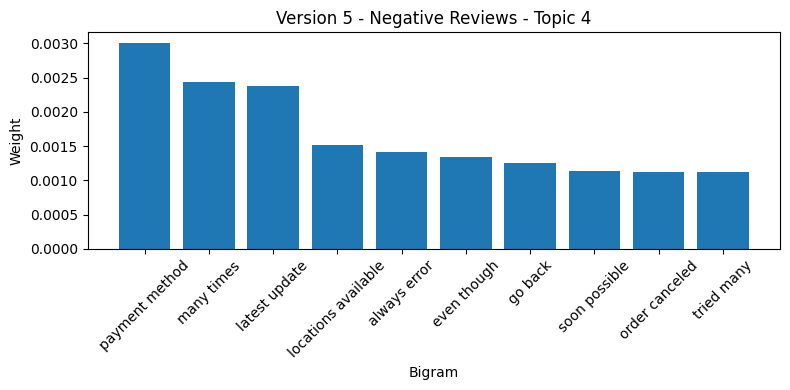



Version: Version 6
Positive Reviews:
Topic 0: 0.018*"far good" + 0.012*"good services" + 0.012*"really helpful" + 0.011*"life easier" + 0.008*"make life" + 0.006*"nice service" + 0.005*"best service" + 0.005*"best ever" + 0.004*"great easy" + 0.004*"great helpful"
Topic 1: 0.086*"good service" + 0.015*"user friendly" + 0.007*"good experience" + 0.006*"good driver" + 0.003*"fast response" + 0.003*"great services" + 0.003*"good helpfull" + 0.003*"easy fast" + 0.003*"verry good" + 0.003*"good useful"
Topic 2: 0.020*"excellent service" + 0.008*"good good" + 0.007*"good easy" + 0.006*"good aplication" + 0.005*"go anywhere" + 0.004*"helpful easy" + 0.004*"makes life" + 0.004*"online transportation" + 0.004*"always good" + 0.003*"easy go"
Topic 3: 0.024*"great service" + 0.006*"really helps" + 0.005*"good helpful" + 0.004*"nice easy" + 0.004*"many promos" + 0.003*"easy helpful" + 0.003*"nice helpful" + 0.003*"useful helpful" + 0.003*"help lot" + 0.003*"ordering food"
Topic 4: 0.012*"really 

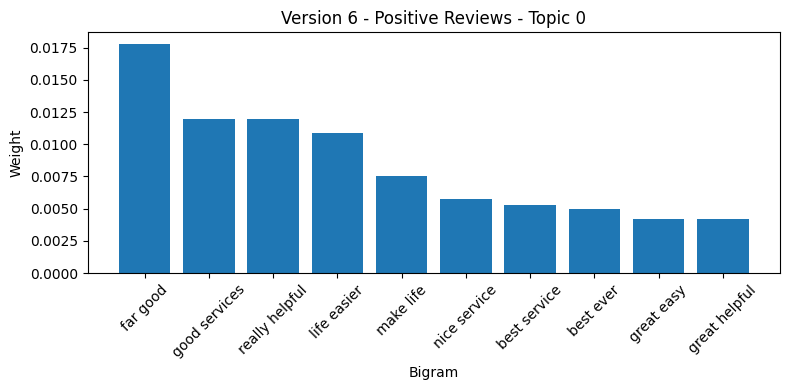

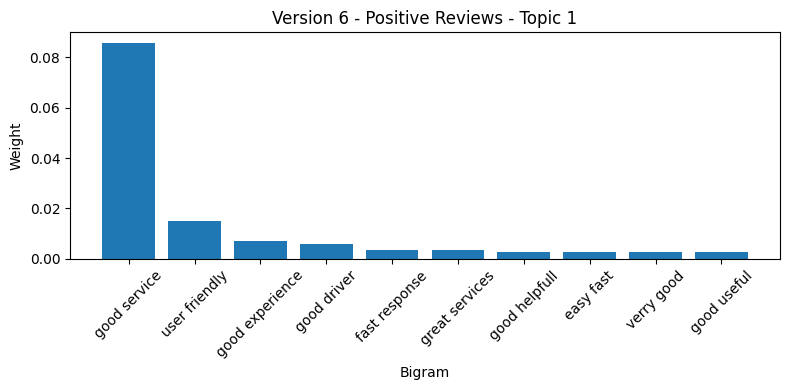

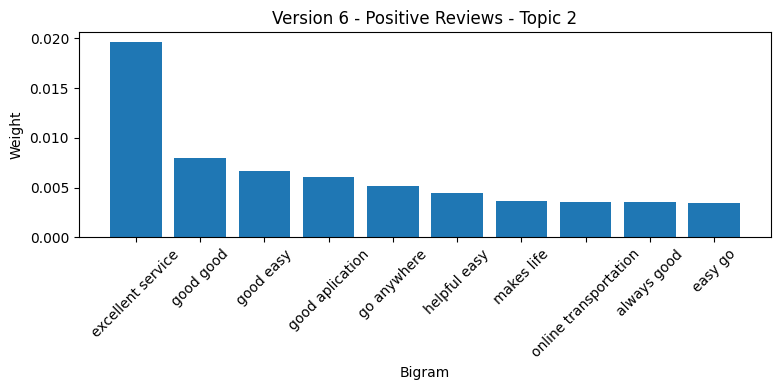

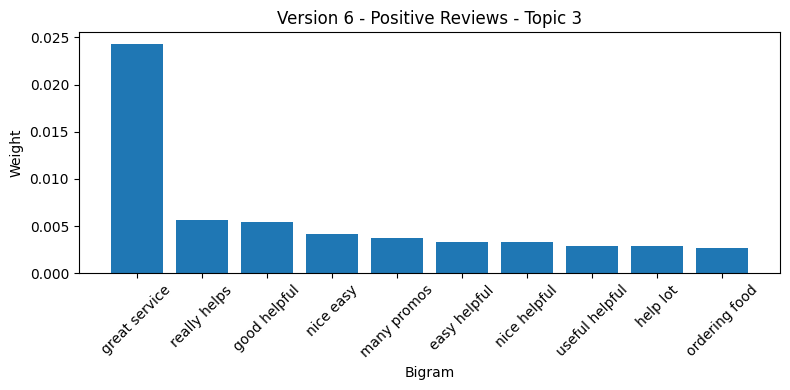

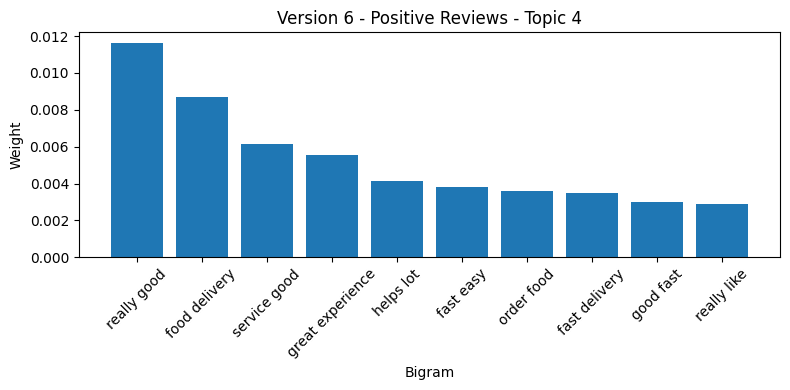


Negative Reviews:
Topic 0: 0.002*"credit card" + 0.001*"even though" + 0.001*"far away" + 0.001*"getting expensive" + 0.001*"would better" + 0.001*"verification code" + 0.001*"pin location" + 0.001*"fix issue" + 0.001*"google maps" + 0.001*"would like"
Topic 1: 0.006*"even though" + 0.002*"promo codes" + 0.002*"user friendly" + 0.002*"phone number" + 0.002*"many times" + 0.001*"customer service" + 0.001*"high demand" + 0.001*"account suspended" + 0.001*"ovo payment" + 0.001*"next door"
Topic 2: 0.003*"even though" + 0.003*"order food" + 0.002*"ovo balance" + 0.002*"customer service" + 0.002*"find driver" + 0.002*"drivers busy" + 0.002*"promo code" + 0.001*"phone number" + 0.001*"driver always" + 0.001*"hard find"
Topic 3: 0.005*"promo code" + 0.004*"payment method" + 0.002*"food delivery" + 0.002*"order food" + 0.001*"sometimes driver" + 0.001*"even though" + 0.001*"ordering food" + 0.001*"book ride" + 0.001*"many promo" + 0.001*"long time"
Topic 4: 0.002*"long time" + 0.002*"order fo

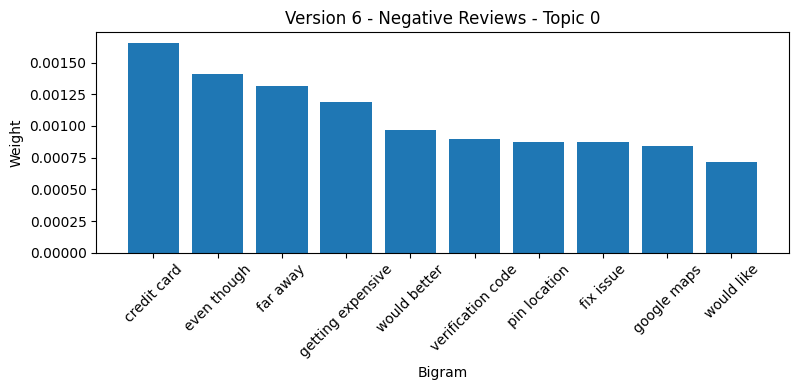

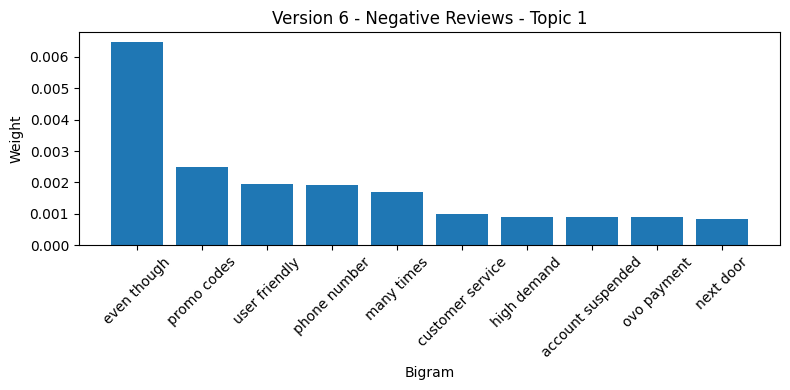

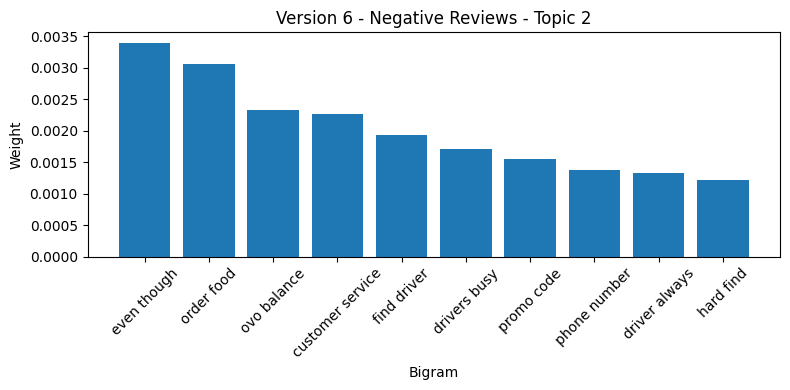

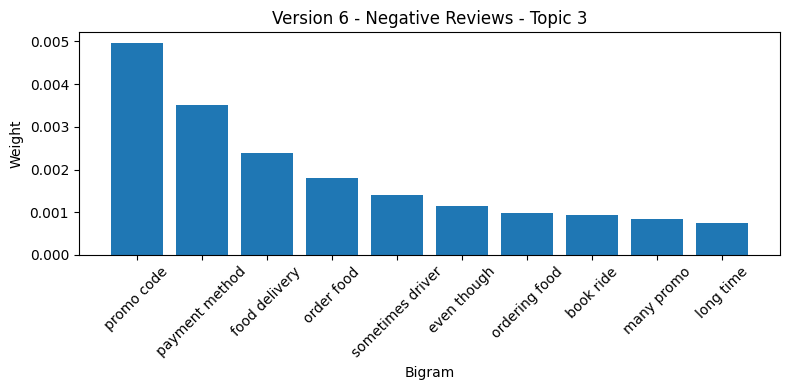

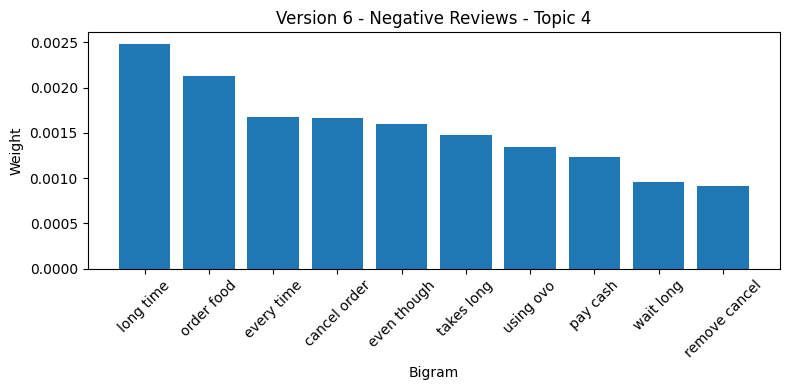



Version: Version 7
Positive Reviews:
Topic 0: 0.009*"good easy" + 0.009*"nice service" + 0.006*"best service" + 0.006*"great experience" + 0.006*"good helpful" + 0.005*"good fast" + 0.005*"easy fast" + 0.005*"food delivery" + 0.004*"really helps" + 0.003*"friendly driver"
Topic 1: 0.023*"great service" + 0.008*"really helpful" + 0.004*"order food" + 0.004*"user friendly" + 0.004*"many promo" + 0.003*"great transportation" + 0.003*"easy ride" + 0.003*"drivers friendly" + 0.003*"good make" + 0.002*"makes easier"
Topic 2: 0.073*"good service" + 0.021*"excellent service" + 0.012*"user friendly" + 0.008*"fast delivery" + 0.004*"good price" + 0.003*"nice helpful" + 0.003*"fast easy" + 0.003*"convenient easy" + 0.003*"go somewhere" + 0.003*"helpful especially"
Topic 3: 0.015*"far good" + 0.006*"great helpful" + 0.005*"good experience" + 0.003*"easy helpful" + 0.003*"good promo" + 0.003*"easy convenient" + 0.003*"helpful easy" + 0.003*"nice easy" + 0.003*"ok good" + 0.003*"easy used"
Topic 4

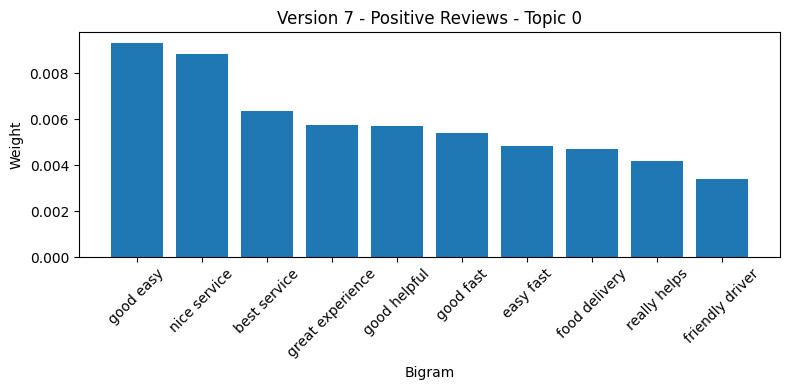

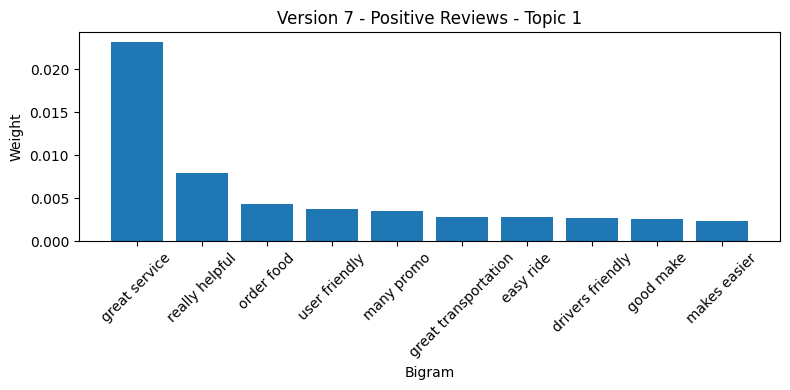

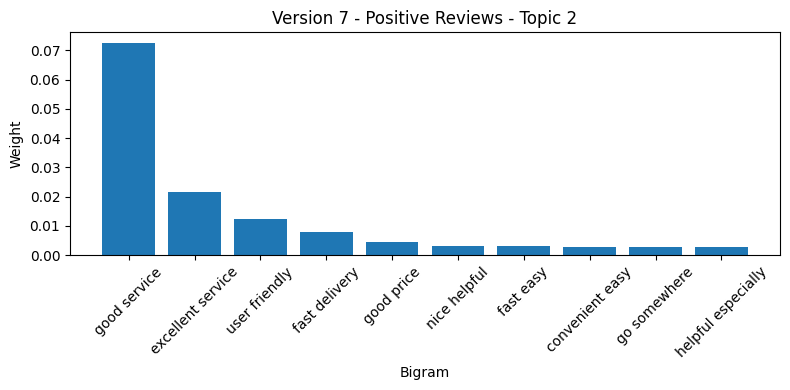

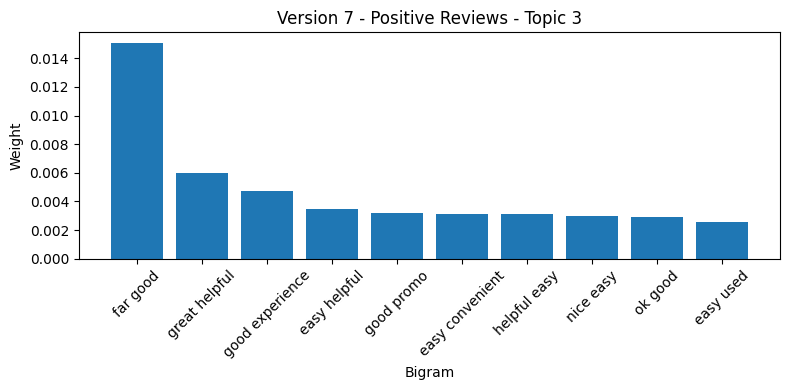

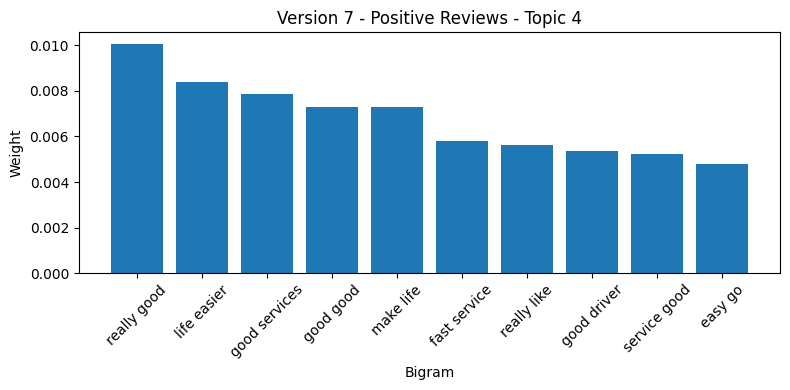


Negative Reviews:
Topic 0: 0.001*"every time" + 0.001*"long time" + 0.001*"book ride" + 0.001*"bad service" + 0.001*"promo code" + 0.001*"even though" + 0.001*"pickup point" + 0.001*"would better" + 0.001*"regular taxi" + 0.001*"good sometime"
Topic 1: 0.004*"even though" + 0.002*"every time" + 0.002*"food delivery" + 0.001*"latest update" + 0.001*"price expensive" + 0.001*"far away" + 0.001*"hard find" + 0.001*"several times" + 0.001*"order food" + 0.001*"drivers often"
Topic 2: 0.002*"long time" + 0.002*"good service" + 0.002*"even though" + 0.002*"take selfie" + 0.001*"promo code" + 0.001*"home page" + 0.001*"customer service" + 0.001*"easy cheap" + 0.001*"service like" + 0.001*"many times"
Topic 3: 0.004*"customer service" + 0.003*"even though" + 0.002*"using ovo" + 0.002*"payment method" + 0.002*"order food" + 0.001*"getting expensive" + 0.001*"latest version" + 0.001*"difficult book" + 0.001*"ovo balance" + 0.001*"everything good"
Topic 4: 0.002*"credit card" + 0.001*"phone numb

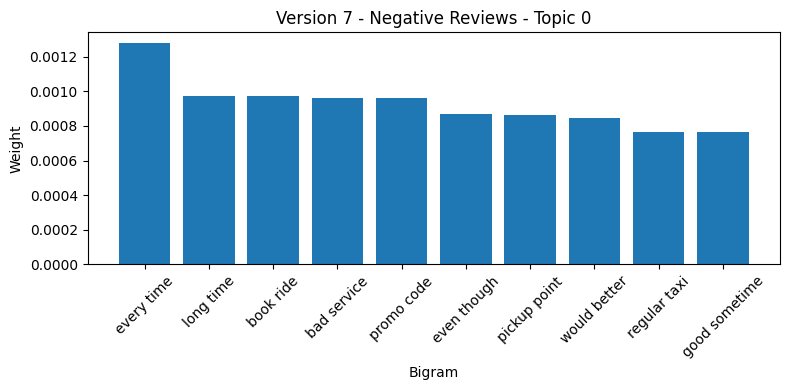

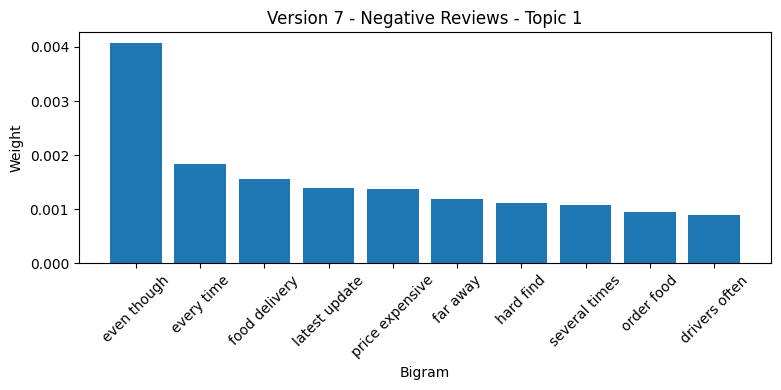

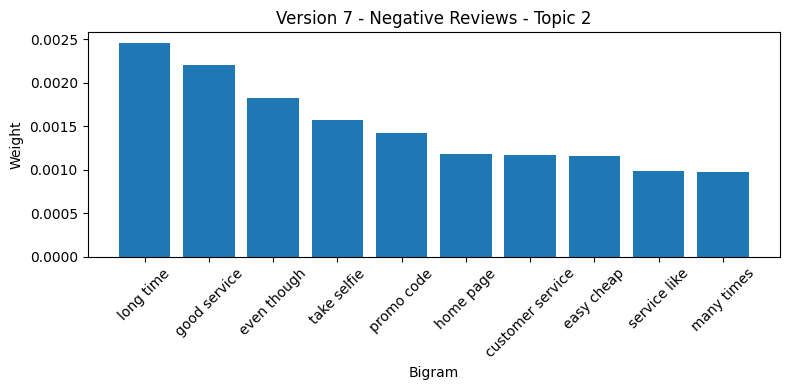

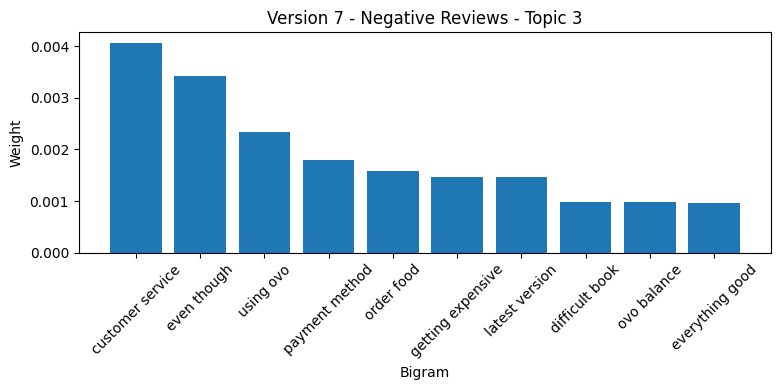

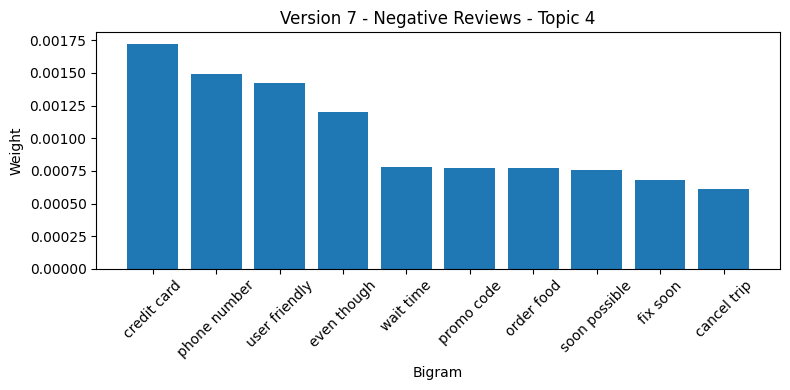



Version: Version 8
Positive Reviews:
Topic 0: 0.013*"good services" + 0.010*"really good" + 0.006*"customer service" + 0.006*"makes life" + 0.004*"service good" + 0.004*"bad experience" + 0.004*"always time" + 0.004*"great easy" + 0.004*"experience drivers" + 0.003*"great ride"
Topic 1: 0.010*"good experience" + 0.007*"good easy" + 0.006*"fast delivery" + 0.006*"good fast" + 0.004*"good good" + 0.004*"highly recommended" + 0.004*"best transportation" + 0.004*"great useful" + 0.003*"good far" + 0.003*"drivers polite"
Topic 2: 0.019*"excellent service" + 0.007*"best ever" + 0.005*"best service" + 0.005*"life easier" + 0.005*"fast service" + 0.005*"nice driver" + 0.004*"make life" + 0.004*"go anywhere" + 0.004*"easy go" + 0.004*"one best"
Topic 3: 0.014*"far good" + 0.006*"good driver" + 0.005*"driver friendly" + 0.005*"really helpful" + 0.005*"fast reliable" + 0.004*"great help" + 0.004*"easy convenient" + 0.003*"daily activities" + 0.003*"great helpful" + 0.003*"fast easy"
Topic 4: 0.

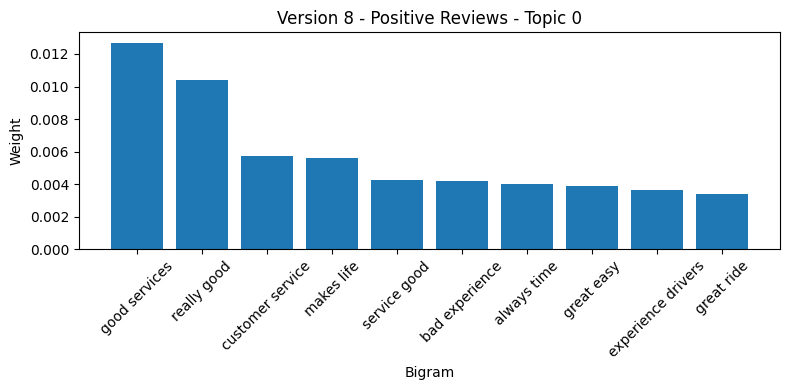

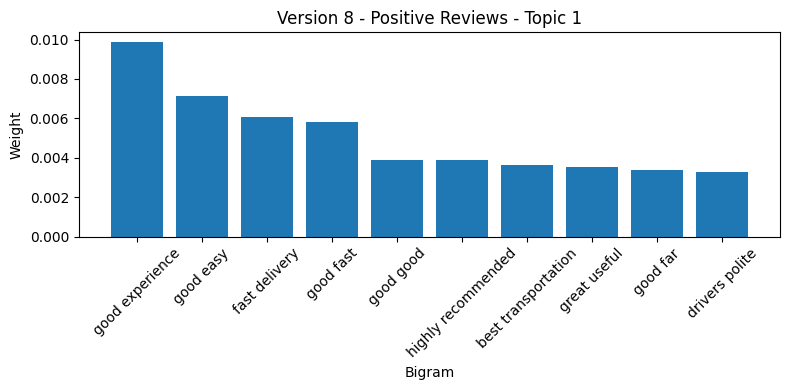

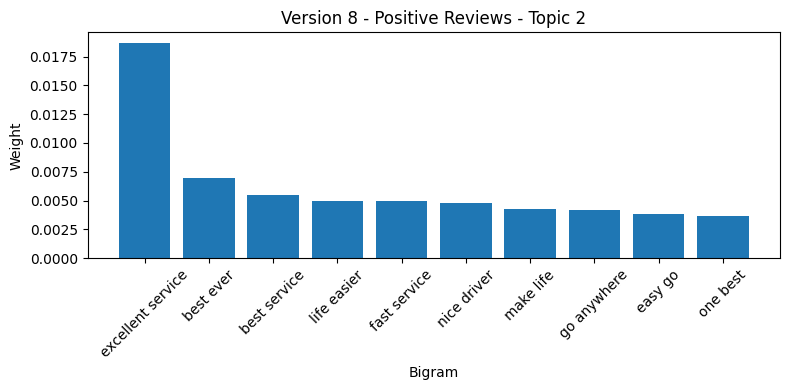

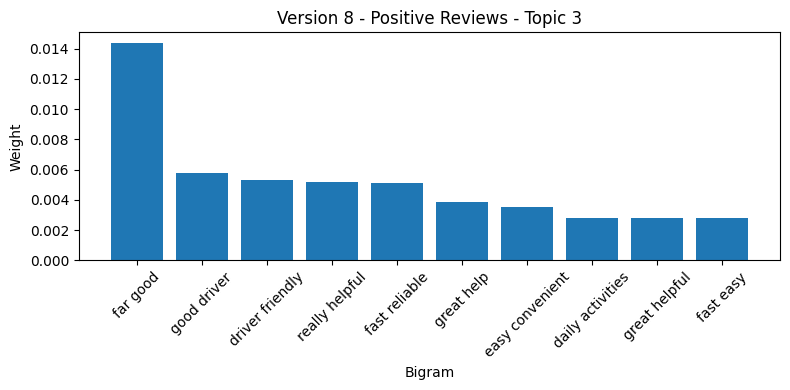

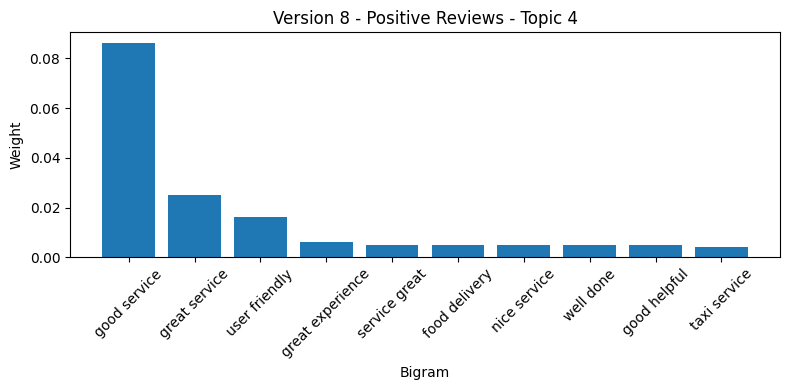


Negative Reviews:
Topic 0: 0.004*"credit card" + 0.004*"even though" + 0.002*"getting expensive" + 0.002*"many times" + 0.001*"help center" + 0.001*"used even" + 0.001*"fully used" + 0.001*"every time" + 0.001*"waste time" + 0.001*"many drivers"
Topic 1: 0.002*"book car" + 0.002*"new update" + 0.001*"latest update" + 0.001*"worst ever" + 0.001*"cancel ride" + 0.001*"even though" + 0.001*"gps location" + 0.001*"make order" + 0.001*"lot time" + 0.001*"promo code"
Topic 2: 0.007*"take selfie" + 0.004*"promo code" + 0.004*"customer service" + 0.004*"even though" + 0.002*"user friendly" + 0.002*"price expensive" + 0.001*"payment method" + 0.001*"account suspended" + 0.001*"ovo balance" + 0.001*"selfie feature"
Topic 3: 0.003*"even though" + 0.002*"selfie verification" + 0.002*"phone number" + 0.001*"promo codes" + 0.001*"location found" + 0.001*"fare getting" + 0.001*"good sometimes" + 0.001*"getting expensive" + 0.001*"pick point" + 0.001*"fare high"
Topic 4: 0.004*"long time" + 0.002*"ha

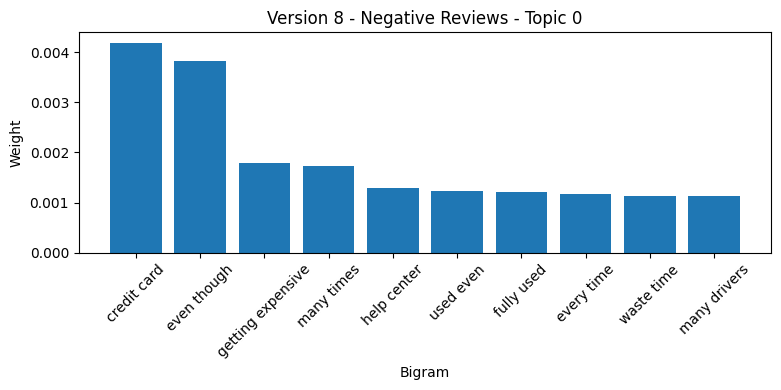

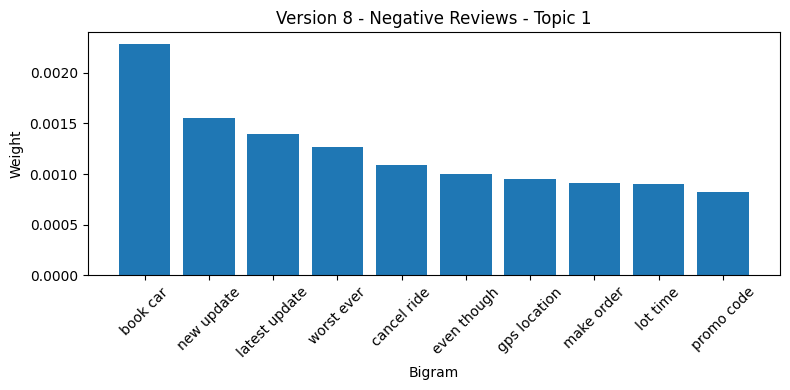

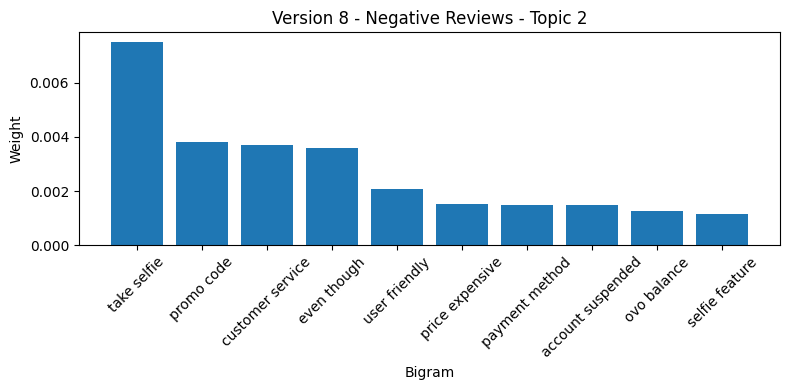

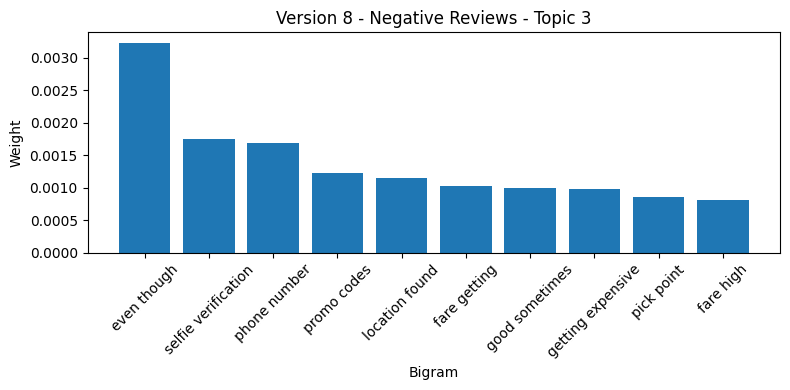

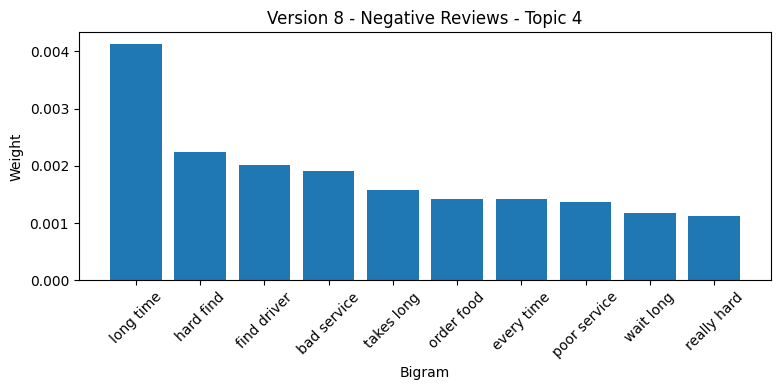



Version: Version 9
Positive Reviews:
Topic 0: 0.003*"nice driver" + 0.003*"enjoyed ride" + 0.003*"great easy" + 0.003*"good performance" + 0.003*"great personality" + 0.003*"overall excellent" + 0.003*"great well" + 0.003*"go home" + 0.003*"reasonable convenient" + 0.003*"using easy"
Topic 1: 0.055*"good service" + 0.006*"fast delivery" + 0.005*"nice good" + 0.005*"well done" + 0.004*"credit card" + 0.003*"vvv good" + 0.003*"better taxi" + 0.003*"many promos" + 0.003*"nice safe" + 0.003*"convenient excellent"
Topic 2: 0.013*"good services" + 0.013*"great experience" + 0.010*"user friendly" + 0.009*"best service" + 0.007*"really helpful" + 0.006*"good transport" + 0.004*"good excellent" + 0.004*"fast convenient" + 0.004*"easy fast" + 0.004*"good nice"
Topic 3: 0.021*"excellent service" + 0.006*"good helpful" + 0.005*"helpful easy" + 0.005*"fast good" + 0.005*"public transport" + 0.004*"useful especially" + 0.004*"ok good" + 0.004*"good efficient" + 0.004*"clean comfortable" + 0.004*"o

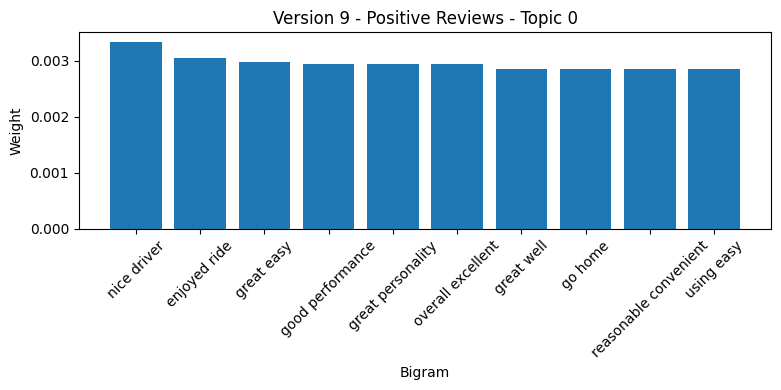

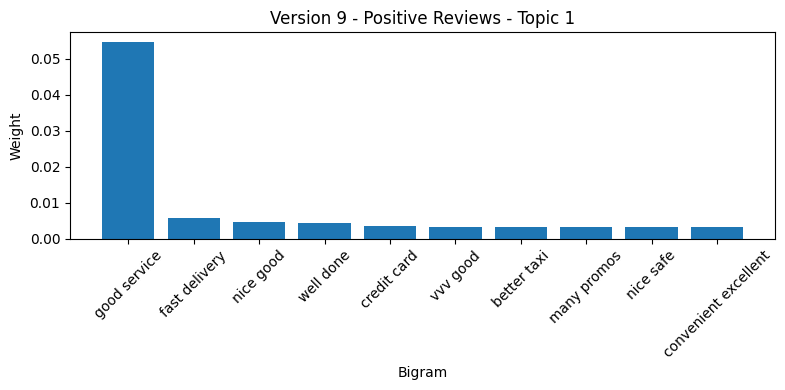

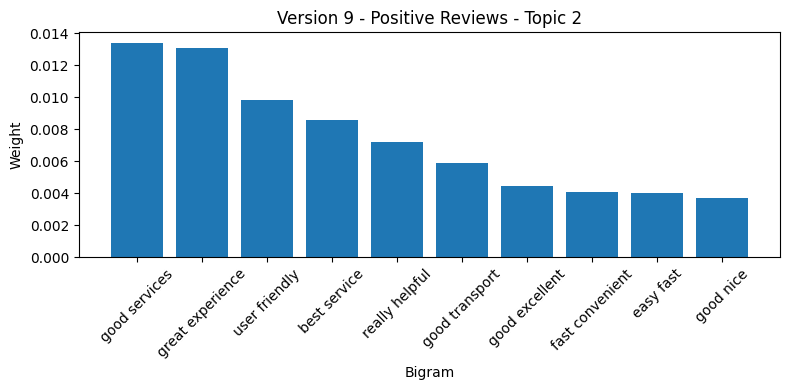

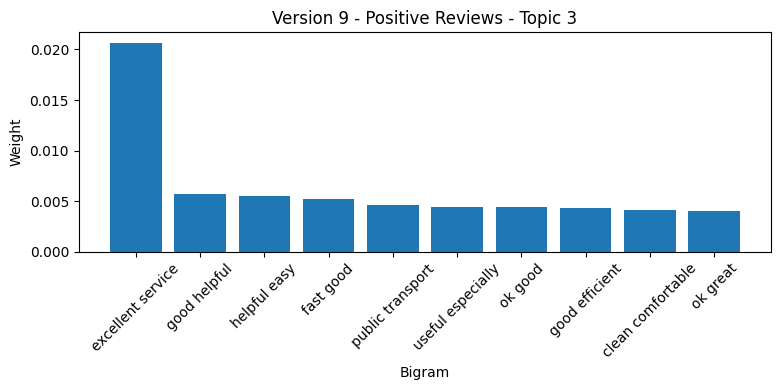

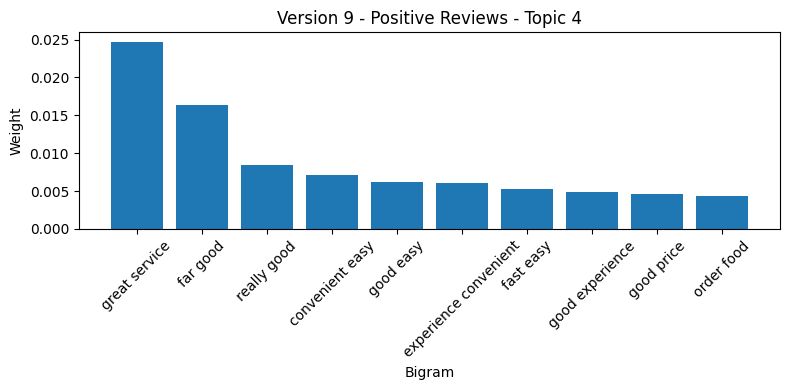


Negative Reviews:
Topic 0: 0.004*"even though" + 0.002*"hard book" + 0.001*"used even" + 0.001*"food delivery" + 0.001*"bad service" + 0.001*"phone number" + 0.001*"order food" + 0.001*"though already" + 0.001*"several times" + 0.001*"taxi drivers"
Topic 1: 0.003*"pay cash" + 0.002*"getting worse" + 0.001*"location still" + 0.001*"even though" + 0.001*"credit card" + 0.001*"drivers cancelling" + 0.001*"time money" + 0.001*"many times" + 0.001*"ordering food" + 0.001*"go back"
Topic 2: 0.002*"even though" + 0.002*"long time" + 0.002*"waste time" + 0.002*"user friendly" + 0.001*"credit card" + 0.001*"pick point" + 0.001*"book car" + 0.001*"many times" + 0.001*"even log" + 0.001*"getting worse"
Topic 3: 0.002*"even though" + 0.001*"take selfie" + 0.001*"payment method" + 0.001*"customer service" + 0.001*"new account" + 0.001*"next door" + 0.001*"order anything" + 0.001*"selfie verification" + 0.001*"location found" + 0.001*"book ride"
Topic 4: 0.003*"promo code" + 0.002*"customer service

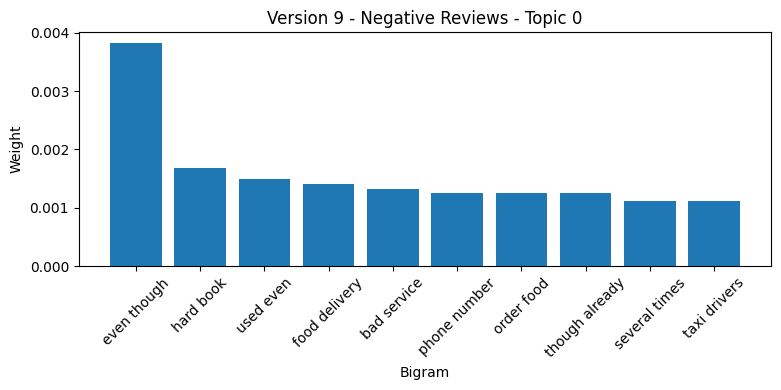

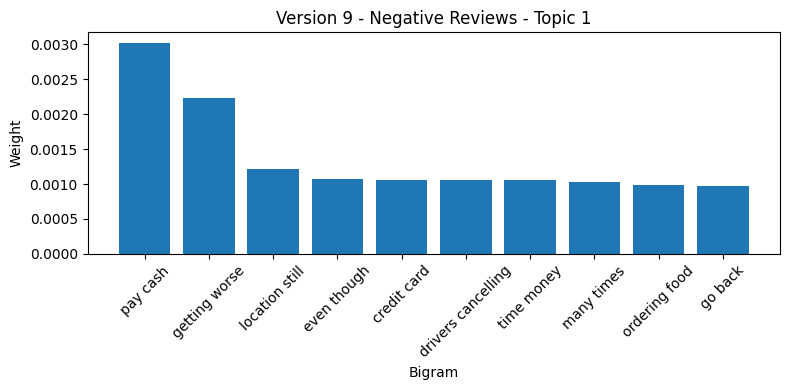

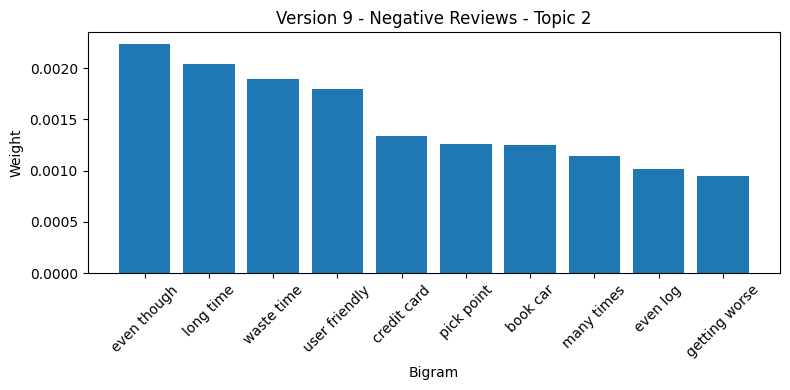

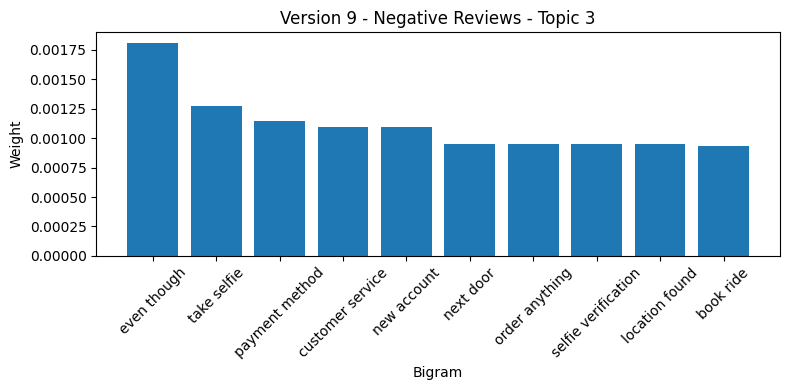

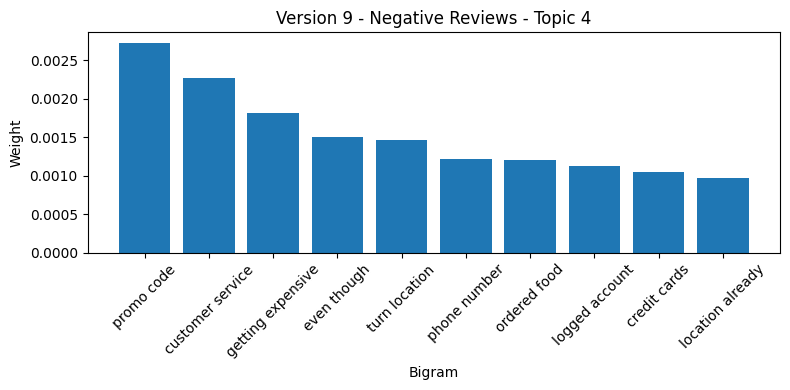



Version: Version 10
Positive Reviews:
Topic 0: 0.032*"good driver" + 0.023*"excellent service" + 0.022*"great service" + 0.010*"user friendly" + 0.007*"really good" + 0.004*"good helpful" + 0.004*"driver helpful" + 0.004*"fast easy" + 0.004*"really helpful" + 0.004*"easy convenient"
Topic 1: 0.009*"far good" + 0.008*"great driver" + 0.007*"food delivery" + 0.006*"driver nice" + 0.005*"nice service" + 0.005*"good experience" + 0.005*"delivery service" + 0.005*"nice good" + 0.004*"nice ride" + 0.003*"good driving"
Topic 2: 0.010*"first time" + 0.009*"driver friendly" + 0.009*"good services" + 0.009*"nice driver" + 0.007*"excellent driver" + 0.007*"best service" + 0.007*"service good" + 0.005*"safe driver" + 0.005*"good easy" + 0.005*"good good"
Topic 3: 0.017*"friendly driver" + 0.008*"customer service" + 0.008*"helpful driver" + 0.007*"friendly helpful" + 0.006*"good fast" + 0.006*"driver good" + 0.006*"fast service" + 0.005*"god bless" + 0.005*"good delivery" + 0.005*"polite driver"


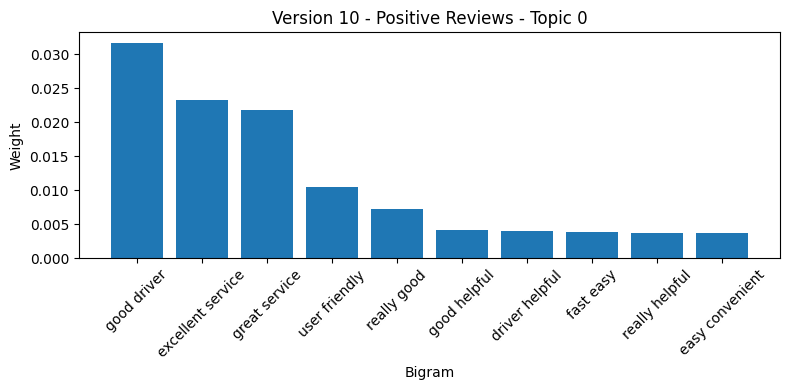

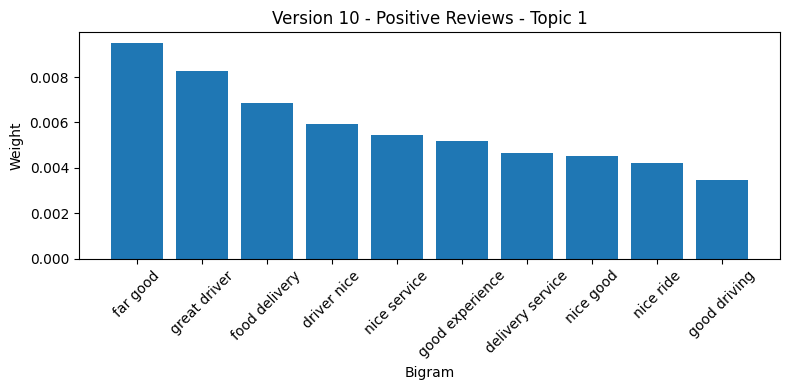

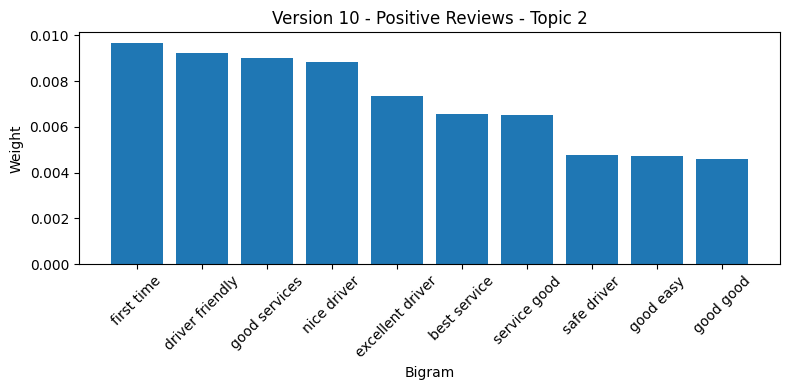

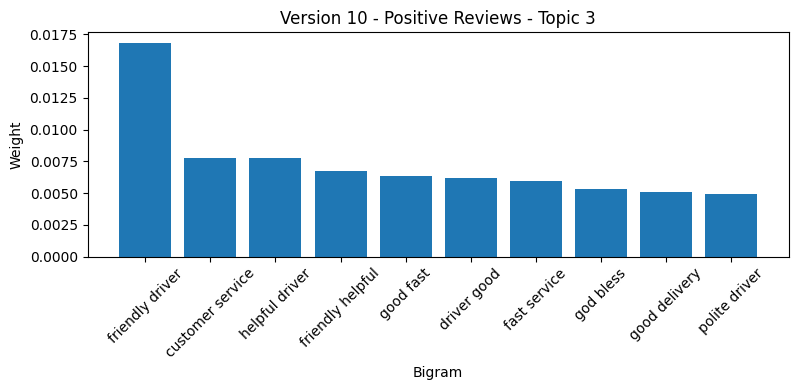

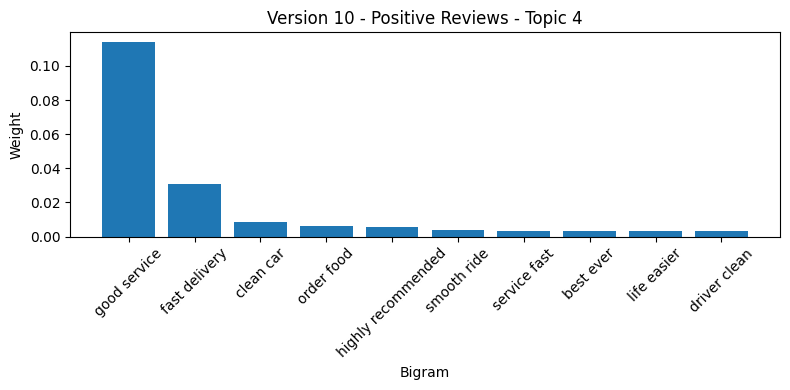


Negative Reviews:
Topic 0: 0.007*"customer service" + 0.004*"help center" + 0.004*"customer support" + 0.003*"phone number" + 0.003*"many times" + 0.003*"pin location" + 0.002*"help centre" + 0.002*"cash payment" + 0.002*"credit card" + 0.002*"hard find"
Topic 1: 0.003*"customer service" + 0.002*"bank account" + 0.002*"order even" + 0.002*"transfer money" + 0.002*"money back" + 0.002*"multiple times" + 0.002*"exact location" + 0.001*"white screen" + 0.001*"much time" + 0.001*"cancelled order"
Topic 2: 0.005*"customer service" + 0.003*"credit card" + 0.003*"delivery fee" + 0.003*"food delivery" + 0.002*"food panda" + 0.002*"really bad" + 0.002*"google maps" + 0.002*"many times" + 0.002*"user friendly" + 0.002*"poor service"
Topic 3: 0.004*"bad service" + 0.003*"book car" + 0.003*"book ride" + 0.003*"even though" + 0.003*"payment method" + 0.003*"bad experience" + 0.003*"hard book" + 0.002*"order food" + 0.002*"first time" + 0.002*"home address"
Topic 4: 0.008*"even though" + 0.008*"lon

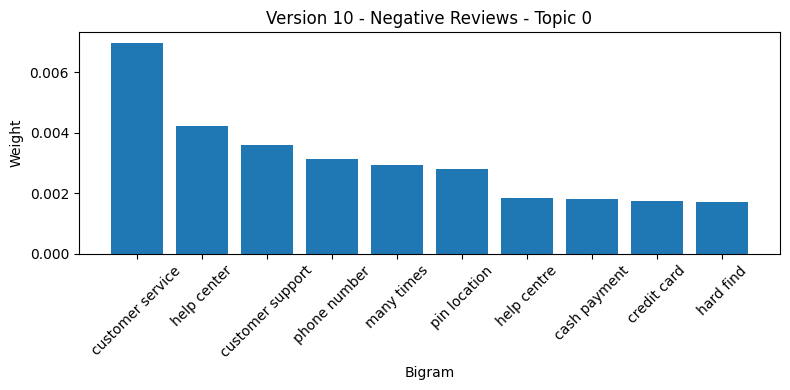

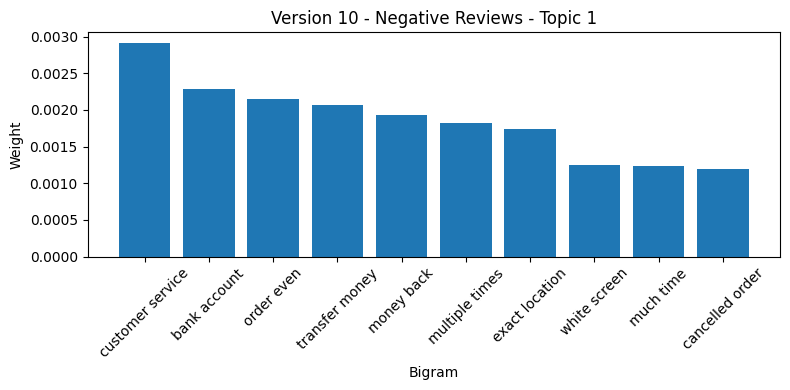

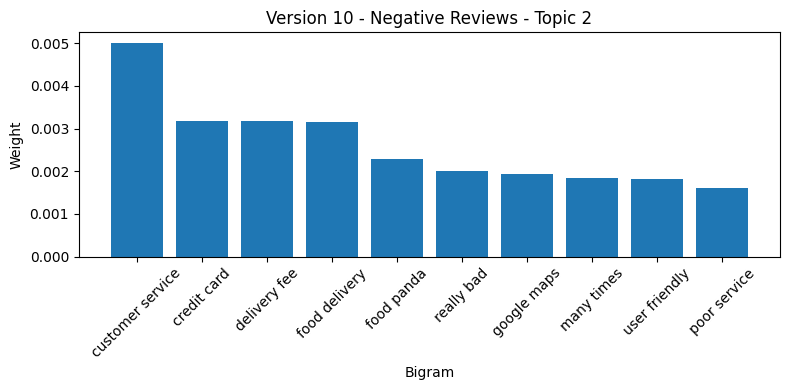

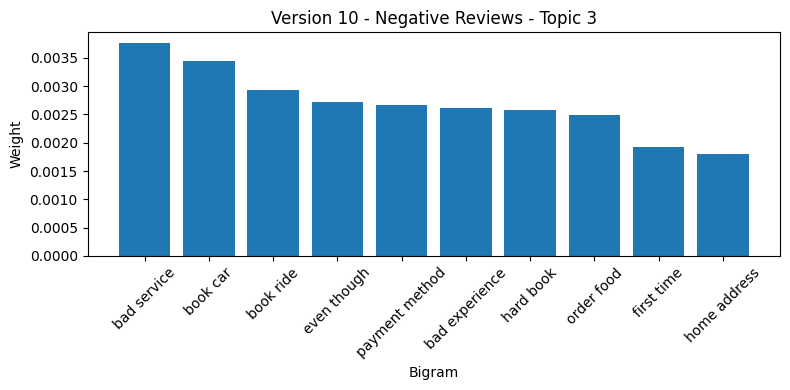

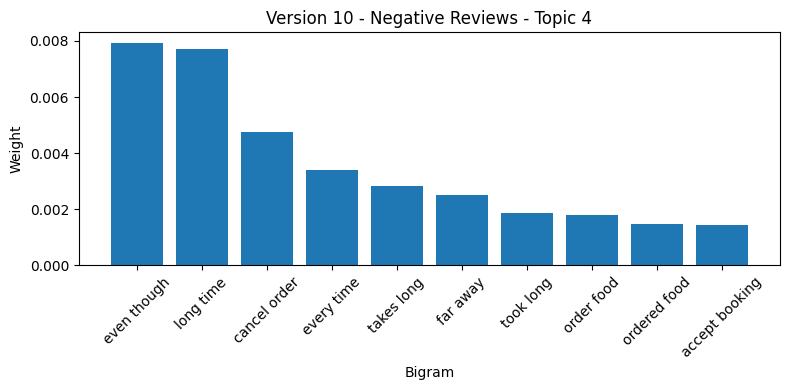

In [21]:
import matplotlib.pyplot as plt

for version, positive_reviews, negative_reviews in versions:
    print(f"Version: {version}")
    print("Positive Reviews:")
    tokenized_positive_reviews = [tokenize_and_extract_bigrams(review) for review in positive_reviews.tolist()]
    dictionary_pos = corpora.Dictionary(tokenized_positive_reviews)
    corpus_pos = [dictionary_pos.doc2bow(tokens) for tokens in tokenized_positive_reviews]
    lda_model_pos = LdaModel(corpus_pos, num_topics=5, id2word=dictionary_pos, passes=15)
    for idx, topic in lda_model_pos.print_topics(-1):
        print(f"Topic {idx}: {topic}")
    
    # Generate and display matplotlib chart
    topics = lda_model_pos.show_topics(formatted=False)
    for topic_num, topic_words in topics:
        words = [word[0] for word in topic_words]
        weights = [word[1] for word in topic_words]
        plt.figure(figsize=(8, 4))
        plt.bar(words, weights)
        plt.title(f"{version} - Positive Reviews - Topic {topic_num}")
        plt.xlabel("Bigram")
        plt.ylabel("Weight")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    print("\nNegative Reviews:")
    tokenized_negative_reviews = [tokenize_and_extract_bigrams(review) for review in negative_reviews.tolist()]
    dictionary_neg = corpora.Dictionary(tokenized_negative_reviews)
    corpus_neg = [dictionary_neg.doc2bow(tokens) for tokens in tokenized_negative_reviews]
    lda_model_neg = LdaModel(corpus_neg, num_topics=5, id2word=dictionary_neg, passes=15)
    for idx, topic in lda_model_neg.print_topics(-1):
        print(f"Topic {idx}: {topic}")
    
    # Generate and display matplotlib chart
    topics = lda_model_neg.show_topics(formatted=False)
    for topic_num, topic_words in topics:
        words = [word[0] for word in topic_words]
        weights = [word[1] for word in topic_words]
        plt.figure(figsize=(8, 4))
        plt.bar(words, weights)
        plt.title(f"{version} - Negative Reviews - Topic {topic_num}")
        plt.xlabel("Bigram")
        plt.ylabel("Weight")
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

    print("\n")


In [17]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk.util import everygrams

def tokenize_and_extract_bigrams(text):
    tokens = word_tokenize(text)
    bigrams = [' '.join(bg) for bg in everygrams(tokens, 2, 2)]
    return bigrams

versions = [
    ("Version 1", ver1_positive, ver1_negative),
    ("Version 2", ver2_positive, ver2_negative),
    ("Version 3", ver3_positive, ver3_negative),
    ("Version 4", ver4_positive, ver4_negative),
    ("Version 5", ver5_positive, ver5_negative),
    ("Version 6", ver6_positive, ver6_negative),
    ("Version 7", ver7_positive, ver7_negative),
    ("Version 8", ver8_positive, ver8_negative),
    ("Version 9", ver9_positive, ver9_negative),
    ("Version 10", ver10_positive, ver10_negative)
]

perplexity_scores = []
coherence_scores = []

for version, positive_reviews, negative_reviews in versions:
    print(f"Version: {version}")
    
    # Positive reviews
    tokenized_positive_reviews = [tokenize_and_extract_bigrams(review) for review in positive_reviews.tolist()]
    dictionary_pos = corpora.Dictionary(tokenized_positive_reviews)
    corpus_pos = [dictionary_pos.doc2bow(tokens) for tokens in tokenized_positive_reviews]
    lda_model_pos = LdaModel(corpus_pos, num_topics=5, id2word=dictionary_pos, passes=15)
    
    # Calculate perplexity for positive reviews
    perplexity_pos = lda_model_pos.log_perplexity(corpus_pos)
    perplexity_scores.append(perplexity_pos)
    print(f"Perplexity (Positive): {perplexity_pos}")
    
    # Calculate coherence for positive reviews
    coherence_model_pos = CoherenceModel(model=lda_model_pos, texts=tokenized_positive_reviews, dictionary=dictionary_pos, coherence='c_v')
    coherence_pos = coherence_model_pos.get_coherence()
    coherence_scores.append(coherence_pos)
    print(f"Coherence (Positive): {coherence_pos}")

    # Negative reviews
    tokenized_negative_reviews = [tokenize_and_extract_bigrams(review) for review in negative_reviews.tolist()]
    dictionary_neg = corpora.Dictionary(tokenized_negative_reviews)
    corpus_neg = [dictionary_neg.doc2bow(tokens) for tokens in tokenized_negative_reviews]
    lda_model_neg = LdaModel(corpus_neg, num_topics=5, id2word=dictionary_neg, passes=15)
    
    # Calculate perplexity for negative reviews
    perplexity_neg = lda_model_neg.log_perplexity(corpus_neg)
    perplexity_scores.append(perplexity_neg)
    print(f"Perplexity (Negative): {perplexity_neg}")
    
    # Calculate coherence for negative reviews
    coherence_model_neg = CoherenceModel(model=lda_model_neg, texts=tokenized_negative_reviews, dictionary=dictionary_neg, coherence='c_v')
    coherence_neg = coherence_model_neg.get_coherence()
    coherence_scores.append(coherence_neg)
    print(f"Coherence (Negative): {coherence_neg}")

    print("\n")

print("Perplexity Scores:", perplexity_scores)
print("Coherence Scores:", coherence_scores)


Version: Version 1
Perplexity (Positive): -7.738492942128909
Coherence (Positive): 0.5649365416375477
Perplexity (Negative): -7.8189870443917835
Coherence (Negative): 0.46642670601889547


Version: Version 2
Perplexity (Positive): -10.75575712826986
Coherence (Positive): 0.7199247890914788
Perplexity (Negative): -11.15612353773355
Coherence (Negative): 0.6050694450734377


Version: Version 3
Perplexity (Positive): -10.503650842703124
Coherence (Positive): 0.6935796516199082
Perplexity (Negative): -11.440882220144443
Coherence (Negative): 0.613728215993691


Version: Version 4
Perplexity (Positive): -9.955848628938174
Coherence (Positive): 0.7224592432050138
Perplexity (Negative): -11.408319828949425
Coherence (Negative): 0.651034868701451


Version: Version 5
Perplexity (Positive): -10.284977367191807
Coherence (Positive): 0.711425368848758
Perplexity (Negative): -12.200258254868013
Coherence (Negative): 0.5017885113490905


Version: Version 6
Perplexity (Positive): -10.733801362174727

Version: Version 1
Optimal Number of Topics (Positive): 2
Optimal Number of Topics (Negative): 2


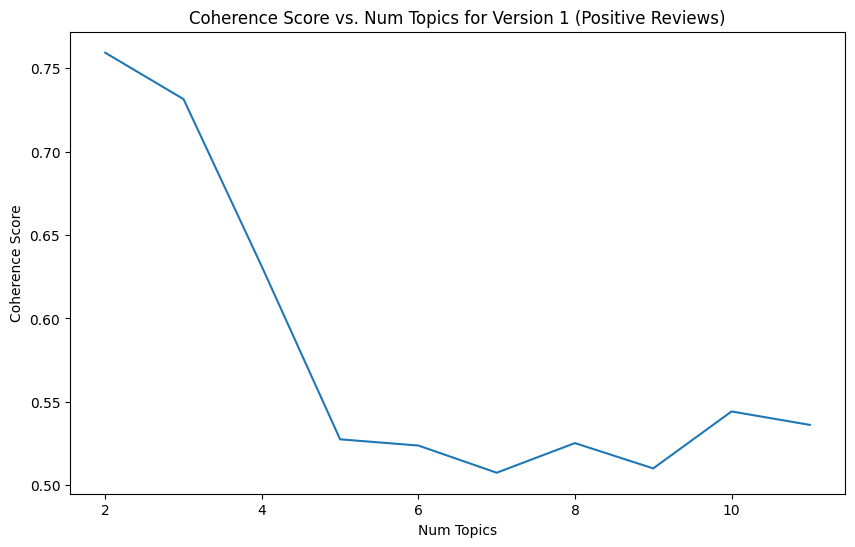

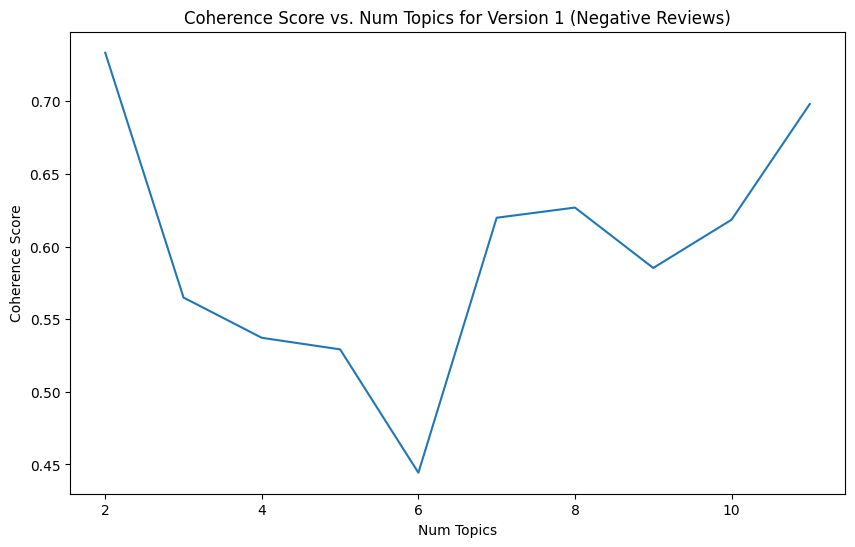



Version: Version 2
Optimal Number of Topics (Positive): 7
Optimal Number of Topics (Negative): 9


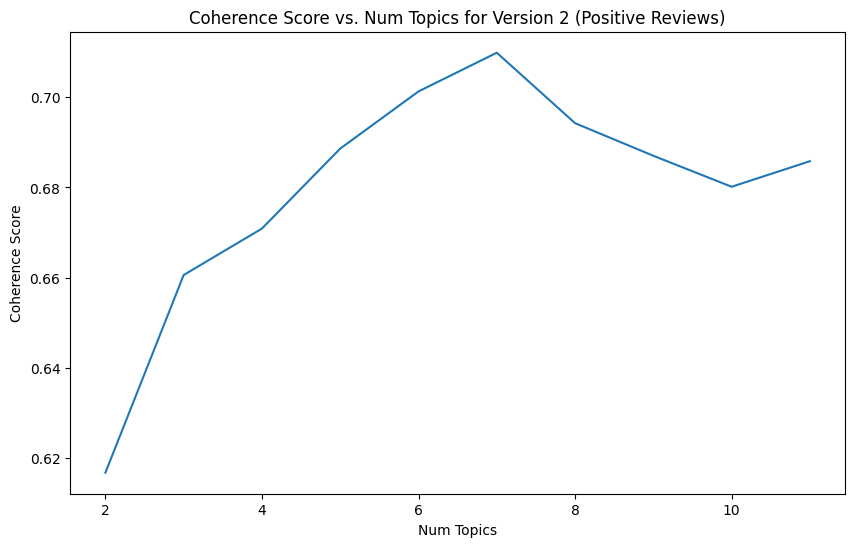

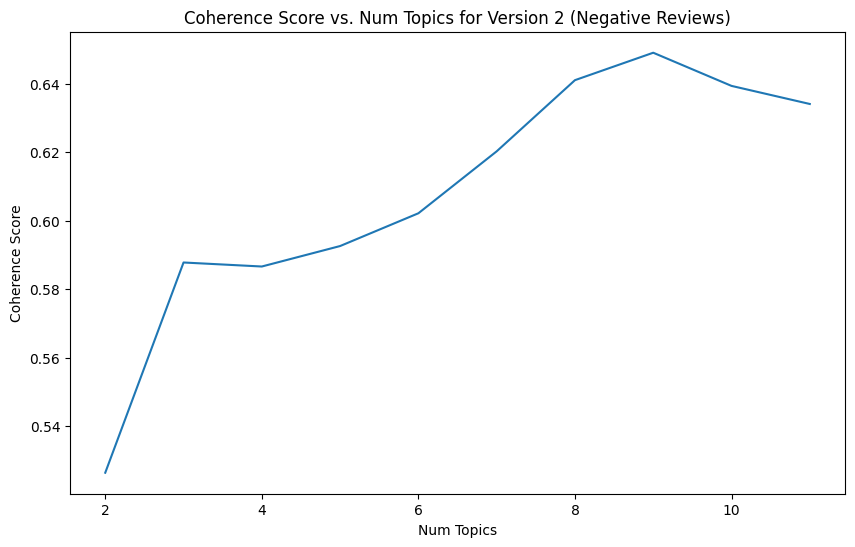



Version: Version 3
Optimal Number of Topics (Positive): 5
Optimal Number of Topics (Negative): 10


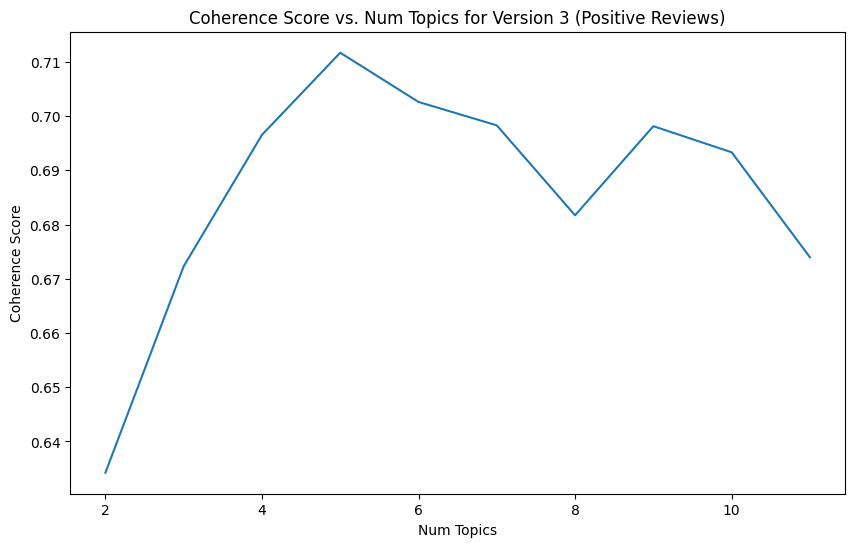

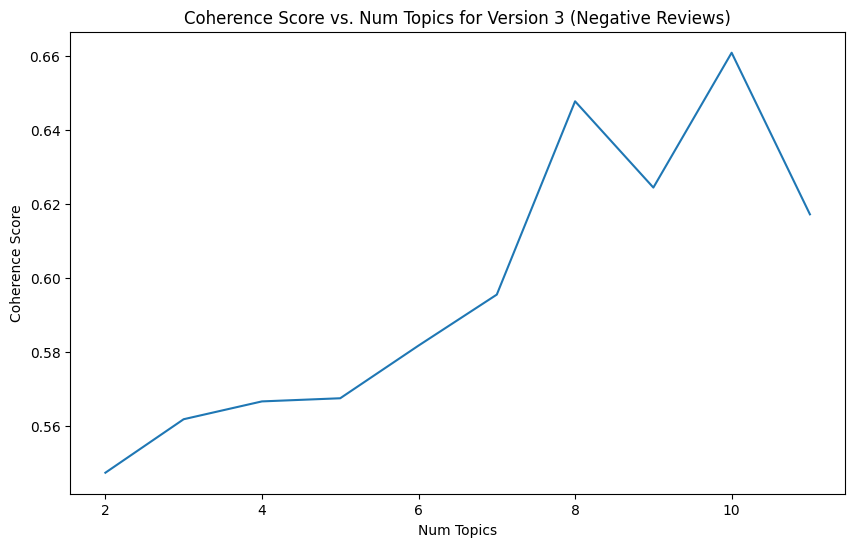



Version: Version 4
Optimal Number of Topics (Positive): 6
Optimal Number of Topics (Negative): 9


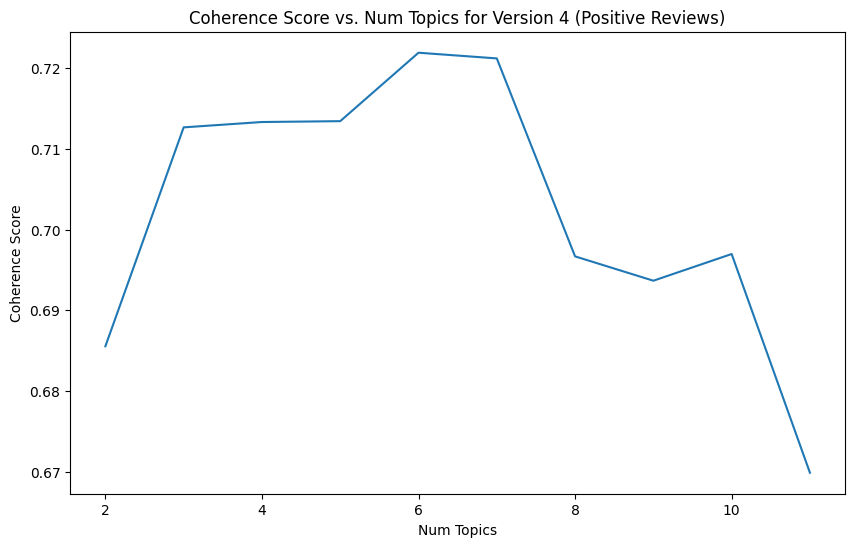

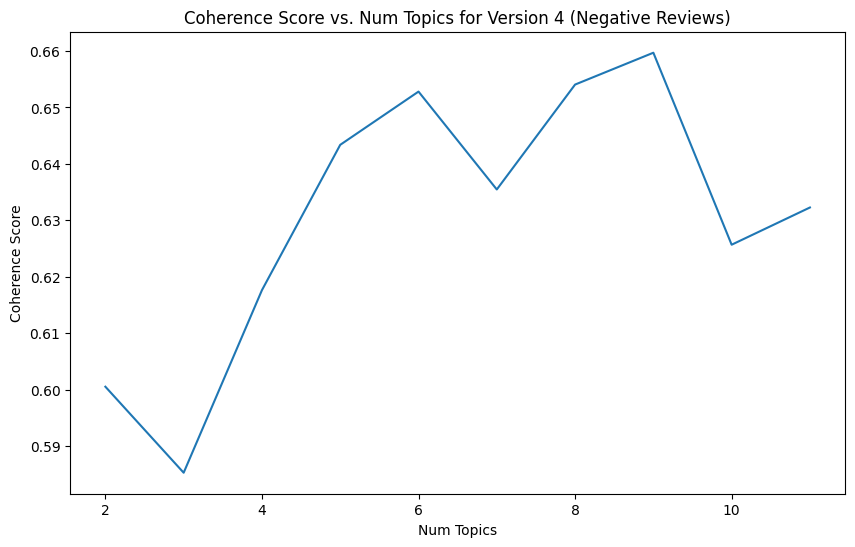



Version: Version 5
Optimal Number of Topics (Positive): 7
Optimal Number of Topics (Negative): 10


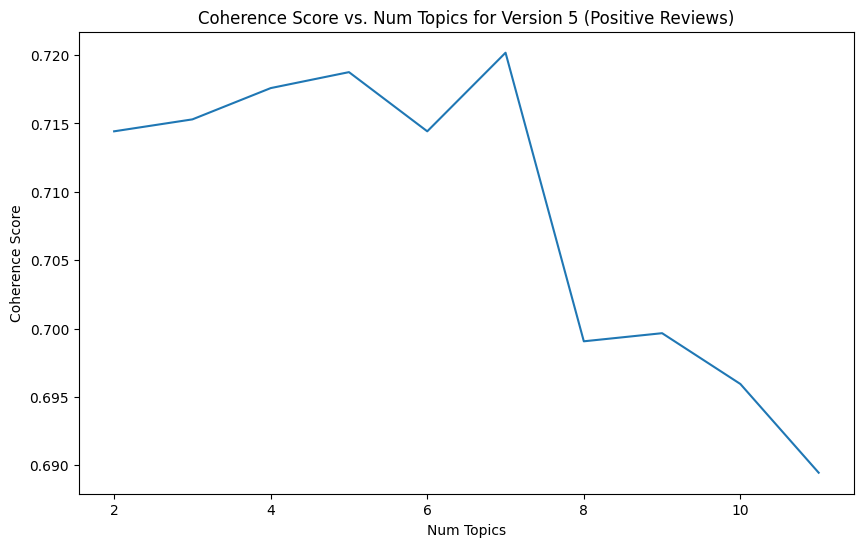

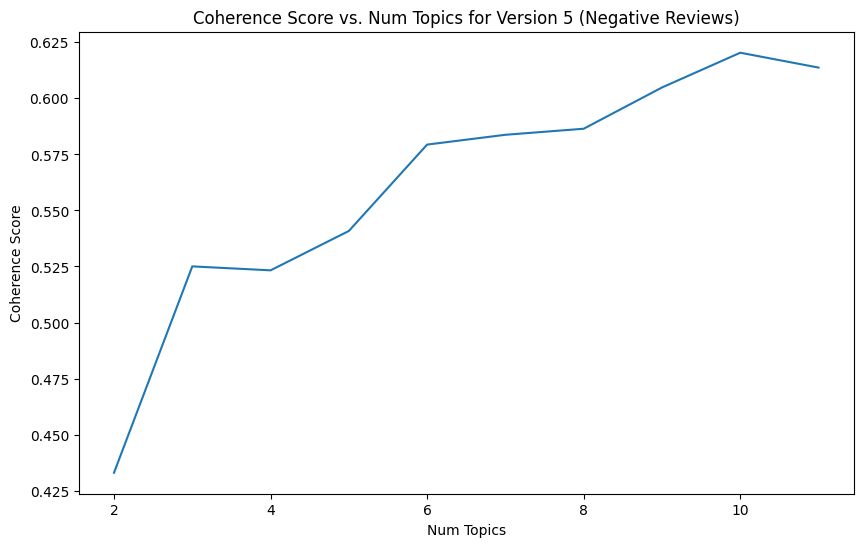



Version: Version 6
Optimal Number of Topics (Positive): 7
Optimal Number of Topics (Negative): 11


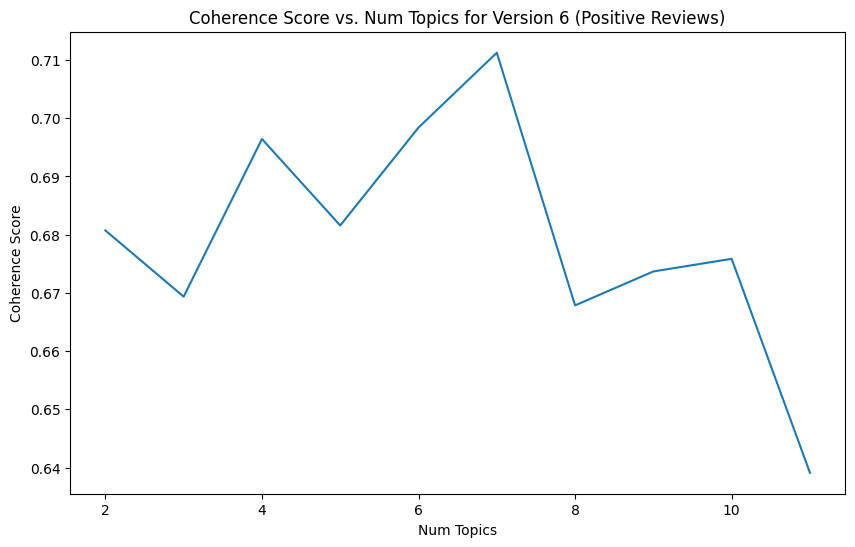

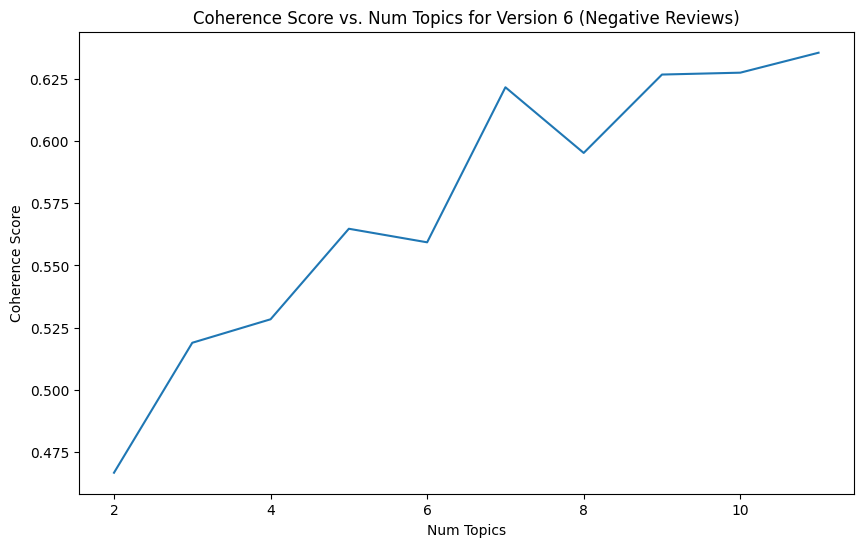



Version: Version 7
Optimal Number of Topics (Positive): 4
Optimal Number of Topics (Negative): 9


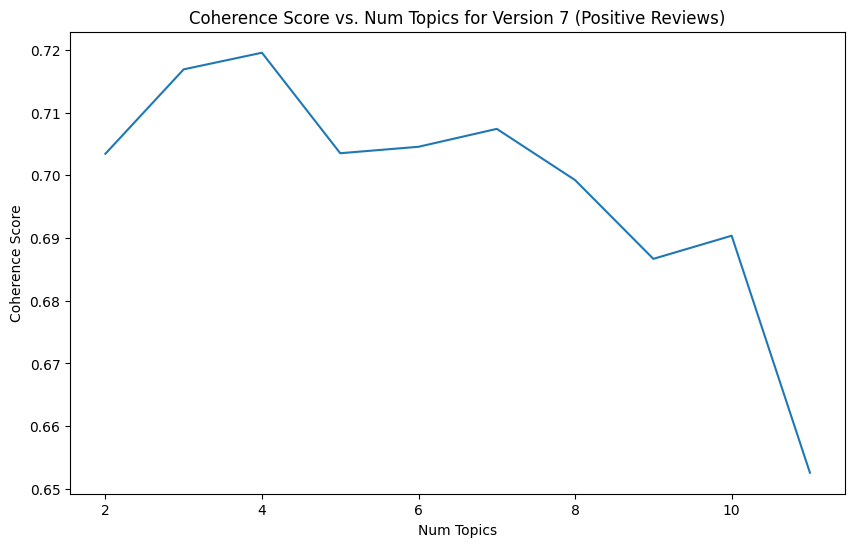

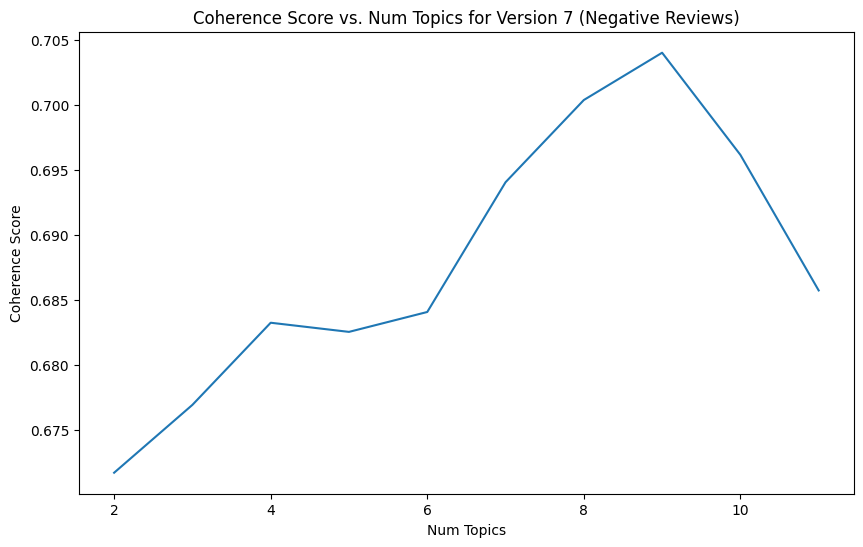



Version: Version 8
Optimal Number of Topics (Positive): 4
Optimal Number of Topics (Negative): 9


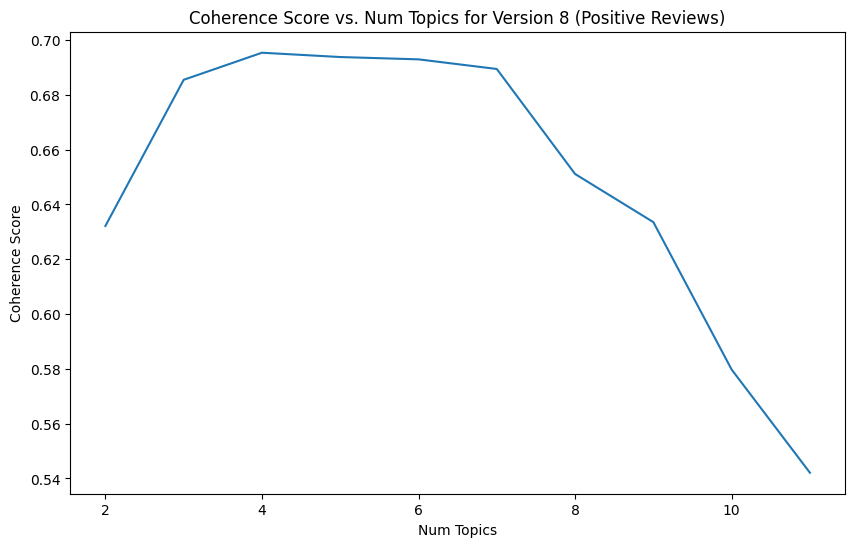

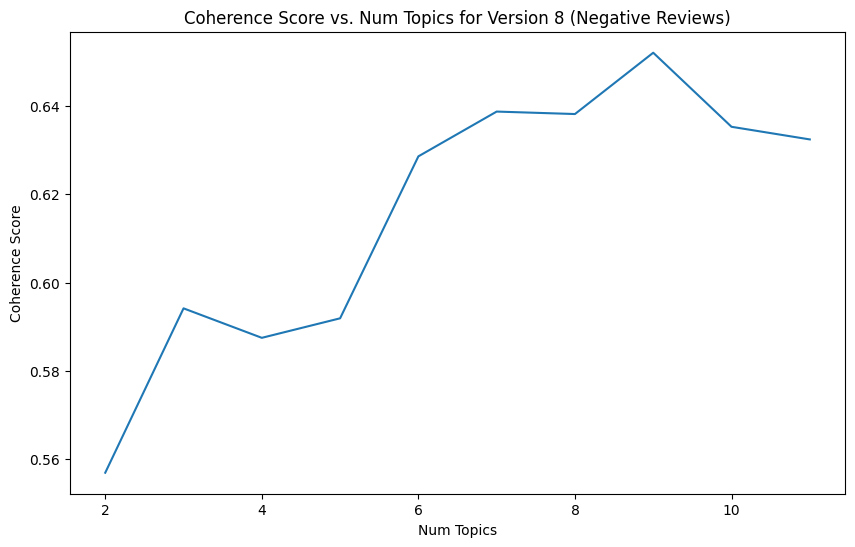



Version: Version 9
Optimal Number of Topics (Positive): 2
Optimal Number of Topics (Negative): 8


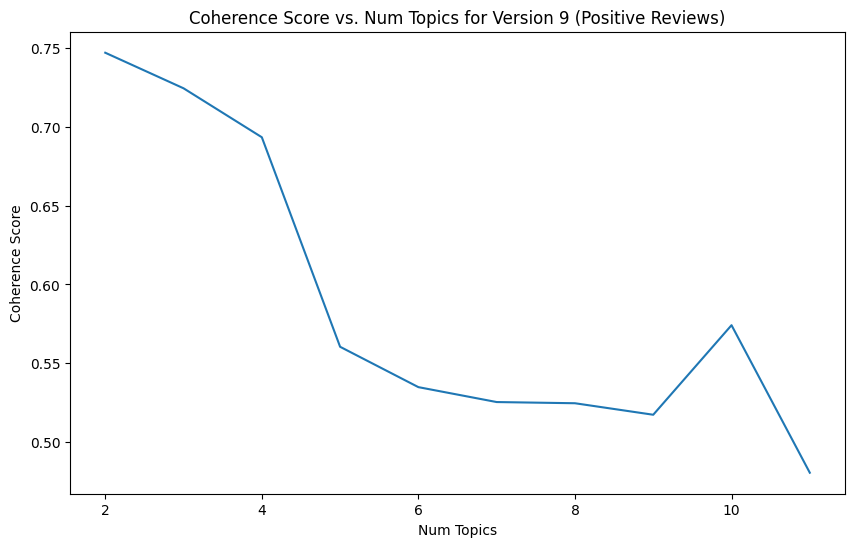

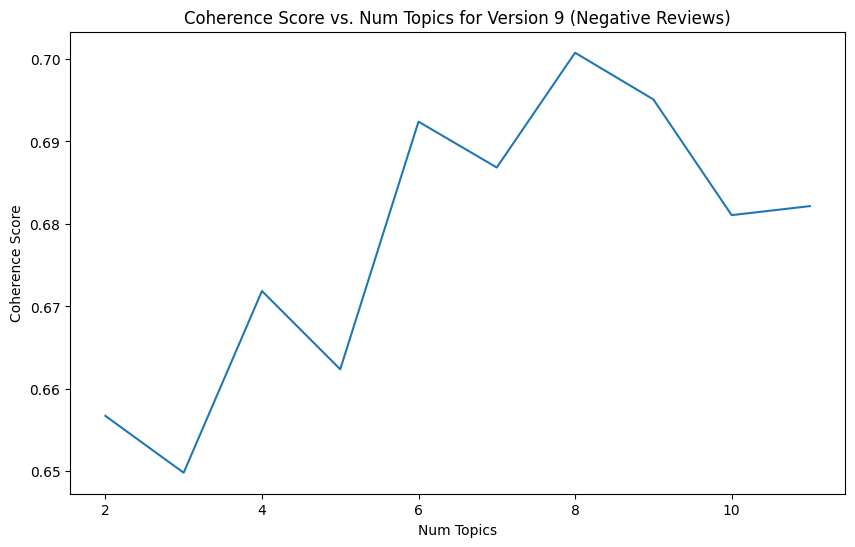



Version: Version 10
Optimal Number of Topics (Positive): 9
Optimal Number of Topics (Negative): 11


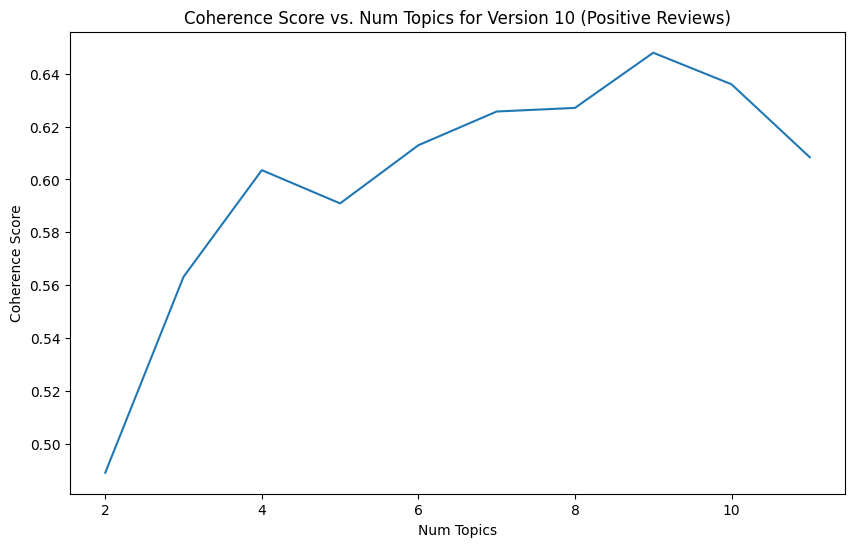

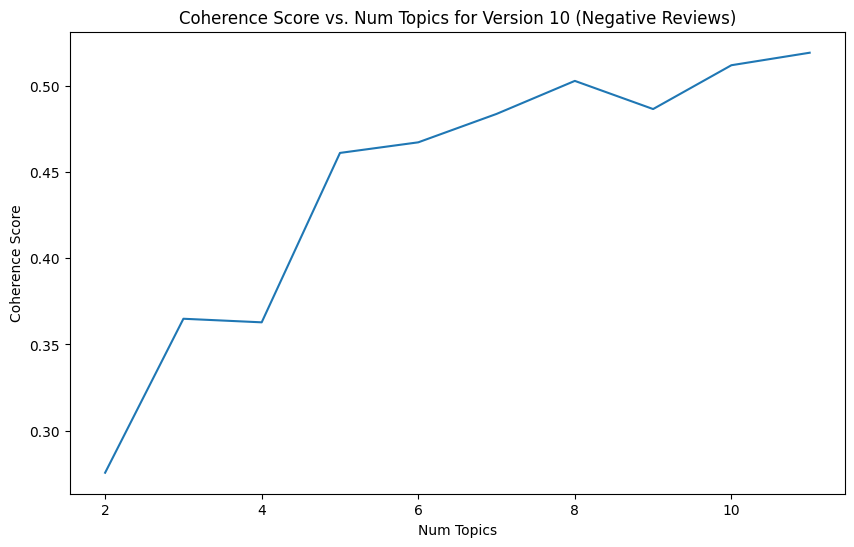

In [18]:
from gensim import corpora
from gensim.models import LdaModel
from gensim.models import CoherenceModel
from nltk.tokenize import word_tokenize
from nltk.util import everygrams
import matplotlib.pyplot as plt

def tokenize_and_extract_bigrams(text):
    tokens = word_tokenize(text)
    bigrams = [' '.join(bg) for bg in everygrams(tokens, 2, 2)]
    return bigrams

versions = [
    ("Version 1", ver1_positive, ver1_negative),
    ("Version 2", ver2_positive, ver2_negative),
    ("Version 3", ver3_positive, ver3_negative),
    ("Version 4", ver4_positive, ver4_negative),
    ("Version 5", ver5_positive, ver5_negative),
    ("Version 6", ver6_positive, ver6_negative),
    ("Version 7", ver7_positive, ver7_negative),
    ("Version 8", ver8_positive, ver8_negative),
    ("Version 9", ver9_positive, ver9_negative),
    ("Version 10", ver10_positive, ver10_negative)
]

for version, positive_reviews, negative_reviews in versions:
    print(f"Version: {version}")
    
    # Positive reviews
    tokenized_positive_reviews = [tokenize_and_extract_bigrams(review) for review in positive_reviews.tolist()]
    dictionary_pos = corpora.Dictionary(tokenized_positive_reviews)
    corpus_pos = [dictionary_pos.doc2bow(tokens) for tokens in tokenized_positive_reviews]
    
    # Find optimal number of topics for positive reviews
    coherence_values_pos = []
    model_topics_pos = []
    for num_topics in range(2, 12):
        lda_model_pos = LdaModel(corpus_pos, num_topics=num_topics, id2word=dictionary_pos, passes=15)
        coherence_model_pos = CoherenceModel(model=lda_model_pos, texts=tokenized_positive_reviews, dictionary=dictionary_pos, coherence='c_v')
        coherence_values_pos.append(coherence_model_pos.get_coherence())
        model_topics_pos.append(num_topics)

    optimal_num_topics_pos = model_topics_pos[coherence_values_pos.index(max(coherence_values_pos))]
    print(f"Optimal Number of Topics (Positive): {optimal_num_topics_pos}")
    
    # Negative reviews
    tokenized_negative_reviews = [tokenize_and_extract_bigrams(review) for review in negative_reviews.tolist()]
    dictionary_neg = corpora.Dictionary(tokenized_negative_reviews)
    corpus_neg = [dictionary_neg.doc2bow(tokens) for tokens in tokenized_negative_reviews]
    
    # Find optimal number of topics for negative reviews
    coherence_values_neg = []
    model_topics_neg = []
    for num_topics in range(2, 12):
        lda_model_neg = LdaModel(corpus_neg, num_topics=num_topics, id2word=dictionary_neg, passes=15)
        coherence_model_neg = CoherenceModel(model=lda_model_neg, texts=tokenized_negative_reviews, dictionary=dictionary_neg, coherence='c_v')
        coherence_values_neg.append(coherence_model_neg.get_coherence())
        model_topics_neg.append(num_topics)

    optimal_num_topics_neg = model_topics_neg[coherence_values_neg.index(max(coherence_values_neg))]
    print(f"Optimal Number of Topics (Negative): {optimal_num_topics_neg}")

    # Plot the coherence scores for positive reviews
    plt.figure(figsize=(10, 6))
    plt.plot(model_topics_pos, coherence_values_pos)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence Score")
    plt.title(f"Coherence Score vs. Num Topics for {version} (Positive Reviews)")
    plt.show()

    # Plot the coherence scores for negative reviews
    plt.figure(figsize=(10, 6))
    plt.plot(model_topics_neg, coherence_values_neg)
    plt.xlabel("Num Topics")
    plt.ylabel("Coherence Score")
    plt.title(f"Coherence Score vs. Num Topics for {version} (Negative Reviews)")
    plt.show()

    print("\n")


In [22]:
import pickle
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from gensim import corpora, models
from nltk.tokenize import word_tokenize
from nltk.util import everygrams

def tokenize_and_extract_bigrams(text):
    tokens = word_tokenize(text)
    bigrams = [' '.join(bg) for bg in everygrams(tokens, 2, 2)]
    return bigrams

versions = [
    ("Version 1", ver1_positive, ver1_negative),
    ("Version 2", ver2_positive, ver2_negative),
    ("Version 3", ver3_positive, ver3_negative),
    ("Version 4", ver4_positive, ver4_negative),
    ("Version 5", ver5_positive, ver5_negative),
    ("Version 6", ver6_positive, ver6_negative),
    ("Version 7", ver7_positive, ver7_negative),
    ("Version 8", ver8_positive, ver8_negative),
    ("Version 9", ver9_positive, ver9_negative),
    ("Version 10", ver10_positive, ver10_negative)
]

for version, positive_reviews, negative_reviews in versions:
    print(f"Version: {version}")
    print("Positive Reviews:")
    tokenized_positive_reviews = [tokenize_and_extract_bigrams(review) for review in positive_reviews.tolist()]
    dictionary_pos = corpora.Dictionary(tokenized_positive_reviews)
    corpus_pos = [dictionary_pos.doc2bow(tokens) for tokens in tokenized_positive_reviews]
    lda_model_pos = models.LdaModel(corpus_pos, num_topics=5, id2word=dictionary_pos, passes=15)
    for idx, topic in lda_model_pos.print_topics(-1):
        print(f"Topic {idx}: {topic}")

    print("\nNegative Reviews:")
    tokenized_negative_reviews = [tokenize_and_extract_bigrams(review) for review in negative_reviews.tolist()]
    dictionary_neg = corpora.Dictionary(tokenized_negative_reviews)
    corpus_neg = [dictionary_neg.doc2bow(tokens) for tokens in tokenized_negative_reviews]
    lda_model_neg = models.LdaModel(corpus_neg, num_topics=5, id2word=dictionary_neg, passes=15)
    for idx, topic in lda_model_neg.print_topics(-1):
        print(f"Topic {idx}: {topic}")

    print("\n")

    # Generate pyLDAvis visualization
    vis_pos = gensimvis.prepare(lda_model_pos, corpus_pos, dictionary_pos)
    vis_neg = gensimvis.prepare(lda_model_neg, corpus_neg, dictionary_neg)

    # Save pyLDAvis visualization as HTML
    pyLDAvis.save_html(vis_pos, f"pyldavis_pos_{version}.html")
    pyLDAvis.save_html(vis_neg, f"pyldavis_neg_{version}.html")

    # Save LDA models using pickle
    with open(f"lda_model_pos_{version}.pickle", "wb") as f:
        pickle.dump(lda_model_pos, f)
    with open(f"lda_model_neg_{version}.pickle", "wb") as f:
        pickle.dump(lda_model_neg, f)


Version: Version 1
Positive Reviews:
Topic 0: 0.006*"first time" + 0.006*"great experience" + 0.003*"really helpful" + 0.003*"easy find" + 0.003*"experience far" + 0.003*"used today" + 0.003*"available cabs" + 0.003*"drivers nice" + 0.003*"rarely rate" + 0.003*"easy interface"
Topic 1: 0.008*"highly recommended" + 0.007*"fast efficient" + 0.005*"safe convenient" + 0.005*"booking cab" + 0.005*"cab drivers" + 0.005*"free booking" + 0.003*"really helpful" + 0.003*"efficient safe" + 0.003*"find taxi" + 0.003*"friendly drivers"
Topic 2: 0.005*"taxi company" + 0.005*"great able" + 0.005*"nice one" + 0.003*"calling taxi" + 0.003*"easy book" + 0.003*"like office" + 0.003*"location call" + 0.003*"driver good" + 0.003*"ok trustworthy" + 0.003*"filipino give"
Topic 3: 0.005*"getting taxi" + 0.005*"getting cab" + 0.005*"great help" + 0.005*"really fast" + 0.003*"excellent service" + 0.003*"good useful" + 0.003*"user real" + 0.003*"nice kind" + 0.003*"airport quite" + 0.003*"west airport"
Topic 4: 

In [ ]:
import pickle
from gensim import corpora, models

# Sample test corpus
test_corpus = [
    "The food was excellent, and the service was impeccable. I would highly recommend this place to anyone.",
    "I was disappointed with the quality of the food. The service was good, but it didn't make up for the food.",
    "The ambiance of the restaurant was very cozy and inviting. The food was delicious, and the service was top-notch.",
    "I loved everything about this place. The food, the service, the ambiance - everything was perfect!",
    "The food was average, and the service was slow. I wouldn't go back to this place again."
]

# Load the LDA model from disk
with open('lda_model_pos_Version 10.pickle', 'rb') as f:
    lda_model = pickle.load(f)

# Preprocess the test corpus
test_corpus = [review.split() for review in test_corpus]

# Create a dictionary from the test corpus
dictionary = corpora.Dictionary(test_corpus)

# Convert the test corpus into a bag of words format
test_corpus_bow = [dictionary.doc2bow(review) for review in test_corpus]

# Print the topics for each document in the test corpus
for doc_id, doc in enumerate(test_corpus_bow):
    doc_topics = lda_model.get_document_topics(doc)
    print(f"Document {doc_id}:")
    for topic, prob in doc_topics:
        print(f"Topic {topic}: {prob:.4f}")
    print()

# Print the top words in the topics for specific documents
def print_top_words_for_doc(doc_id):
    doc = test_corpus_bow[doc_id]
    doc_topics = lda_model.get_document_topics(doc)
    top_topic = max(doc_topics, key=lambda x: x[1])[0]
    top_words = lda_model.show_topic(top_topic)
    print(f"Top words for document {doc_id}:")
    for word, prob in top_words:
        print(f"{word}: {prob:.4f}")

# Specify the document IDs for which you want to print the top words
doc_ids = [0, 1, 4]

# Print the top words for each specified document
for doc_id in doc_ids:
    print_top_words_for_doc(doc_id)
    print()
